In [67]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [68]:
!pip install bioinfokit

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
pd.options.mode.chained_assignment = None  # 'warn' or 'raise'
from bioinfokit.visuz import cluster
from sklearn.decomposition import PCA


In [70]:
#Importing datasets
ev_data=pd.read_csv("gdrive/My Drive/ev_data_india.csv")
geographical_ev=pd.read_csv("gdrive/My Drive/registered_EV.csv")
charging_stations=pd.read_csv("gdrive/My Drive/ev_charging_stations.csv")
behaviour=pd.read_csv("gdrive/My Drive/behaviour_nonEV.csv")

In [71]:
#Checking data
print (ev_data.head(5))
print (geographical_ev.head(5))
print (charging_stations.head(5))
print (all_cars_data.head(5))
print (behaviour.head(5))

print (ev_data.info())
print (geographical_ev.info())
print (charging_stations.info())
print (all_cars_data.info())
print (behaviour.info())

print (ev_data.describe())
print (geographical_ev.describe())
print (charging_stations.describe())
print (all_cars_data.describe())
print (behaviour.describe())

     Brand                    Car             Style Plug_Type Rapid_Charge  \
0     Tata          Tata Nexon EV       Compact SUV    Type 2           No   
1     Tata          Tata Tigor EV  Subcompact Sedan    Type 2           No   
2     Tata      Tata Nexon EV Max       Compact SUV    Type 2           No   
3       MG               MG ZS EV       Compact SUV    Type 2          Yes   
4  Hyundai  Hyundai Kona Electric       Compact SUV    Type 2          Yes   

   Top_Speed  Range Transmission VehicleType  StartPrice  MaxPrice  Capacity  \
0        120    312    Automatic    Electric     1399000   1740000         5   
1        120    306    Automatic    Electric     1249000   1364000         5   
2        140    437    Automatic    Electric     1774000   1924000         5   
3        175    419    Automatic    Electric     2199000   2588000         5   
4        155    452    Automatic    Electric     2379000   2398000         5   

   BootSpace          BaseModel  Reviews_Carwale  

In [72]:
###
#DATASET 1
###

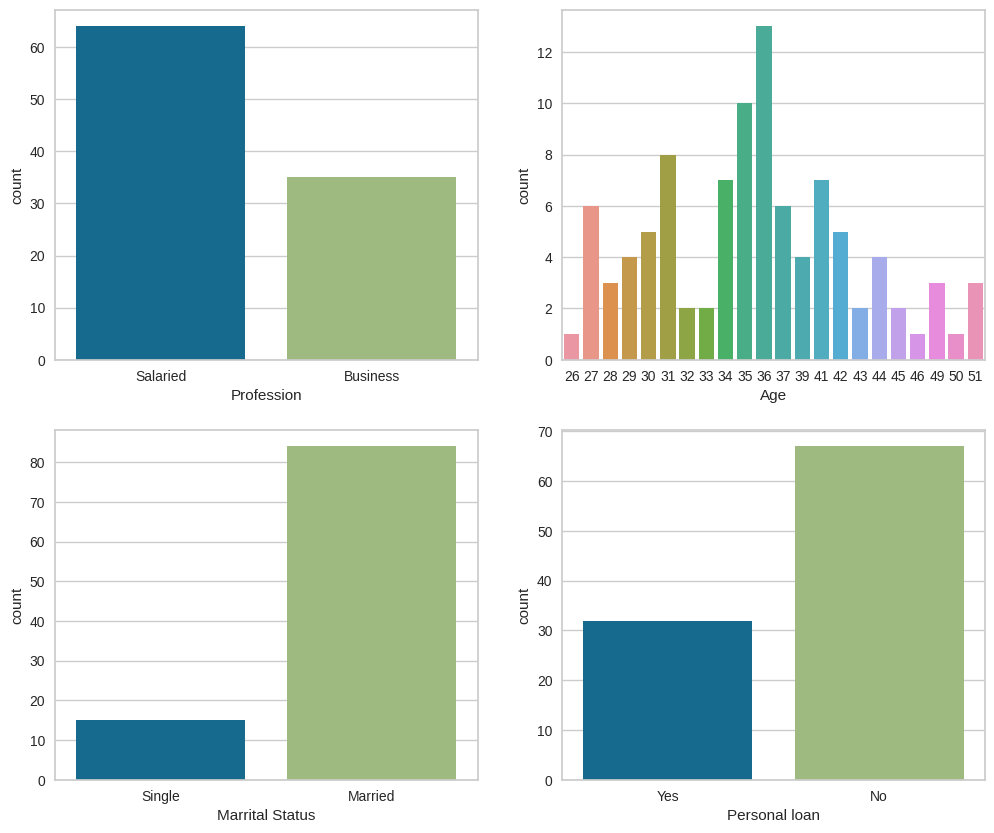

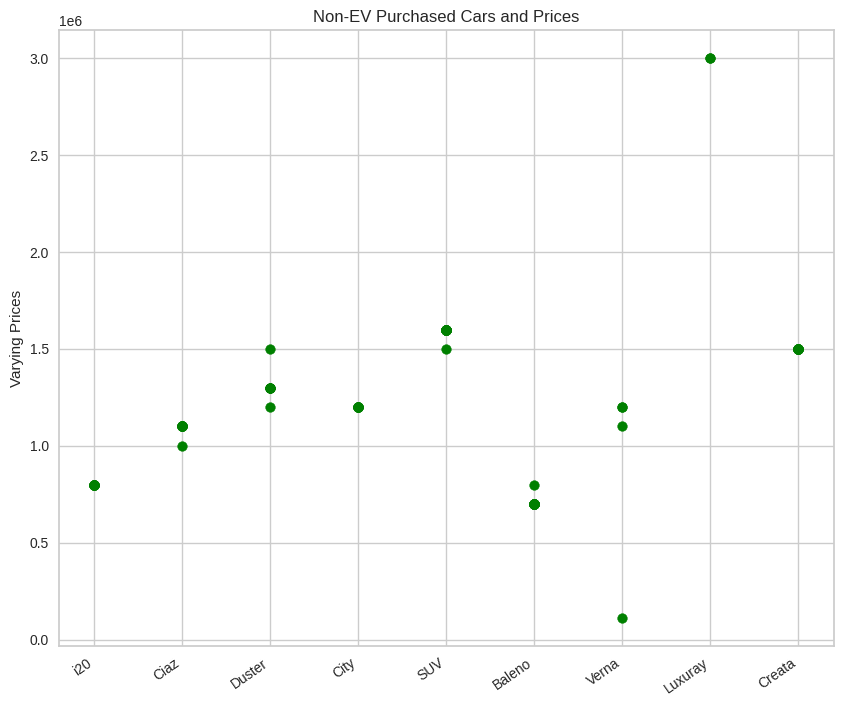

In [73]:
#DATASET FOR NON-EV CUSTOMERS AND THEIR MARKET SEGMENTS

#Exploring behavioural dataset: From the available datasets, comparison of customers.
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(data=behaviour, x='Profession', ax=axes[0, 0])
sns.countplot(data=behaviour, x='Age', ax=axes[0, 1])
sns.countplot(data=behaviour, x='Marrital Status', ax=axes[1, 0])
sns.countplot(data=behaviour, x='Personal loan', ax=axes[1, 1])
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(behaviour['Make'], behaviour['Price'], color='green')
plt.title('Non-EV Purchased Cars and Prices')
plt.ylabel('Varying Prices')
plt.xticks(rotation=35, ha='right')
plt.show()



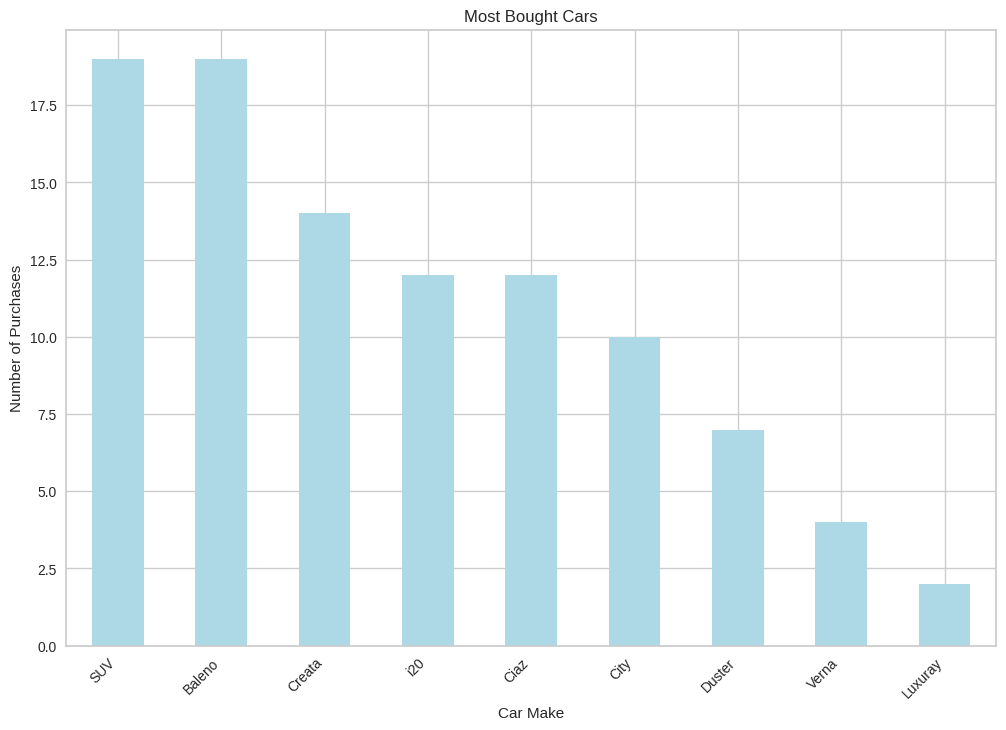


The average Price for each Make:

Make
Baleno     7.052632e+05
Ciaz       1.091667e+06
City       1.200000e+06
Creata     1.500000e+06
Duster     1.314286e+06
Luxuray    3.000000e+06
SUV        1.594737e+06
Verna      9.025000e+05
i20        8.000000e+05
Name: Price, dtype: float64


In [74]:
most_bought_cars = behaviour['Make'].value_counts()

plt.figure(figsize=(12, 8))
most_bought_cars.plot(kind='bar', color='lightblue')
plt.title('Most Bought Cars')
plt.xlabel('Car Make')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.show()

most_bought_cars = behaviour['Make'].value_counts().index[:9]
most_bought_cars_data = behaviour[behaviour['Make'].isin(most_bought_cars)]
average_prices = most_bought_cars_data.groupby('Make')['Price'].mean()
print ("\nThe average Price for each Make:\n")
print(average_prices)

In [75]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

df_encoded=behaviour.copy()

label_encoder = LabelEncoder()

for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
print (df_encoded)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_encoded)


pca = PCA(n_components=13)
pca.fit(standardized_data)

principal_components = pca.transform(standardized_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13']
pf = pd.DataFrame(data = principal_components, columns = names)

print ("\n\nAfter applying PCA")
print (pf.head(),'\n')


#This gives us a sense of which attributes are relevant.
print (pca.explained_variance_ratio_)

    Age  Profession  Marrital Status  Education  No of Dependents  \
0    27           1                1          1                 0   
1    35           1                0          1                 2   
2    45           0                0          0                 4   
3    41           0                0          1                 3   
4    31           1                0          1                 2   
..  ...         ...              ...        ...               ...   
94   27           0                1          0                 0   
95   50           1                0          1                 3   
96   51           0                0          0                 2   
97   51           1                0          1                 2   
98   51           1                0          1                 2   

    Personal loan  House Loan  Wife Working   Salary  Wife Salary  \
0               1           0             0   800000            0   
1               1           1    

In [76]:
for iteration in range(pca.n_components_):
        print(f"PC{iteration + 1}")
        print(f"Standard deviation: {np.round(np.sqrt(pca.explained_variance_[iteration]), 4)}")
        print(f"Proportion of Variance: {np.round(pca.explained_variance_ratio_[iteration], 4)}")
        print(f"Cumulative Proportion: {np.round(np.sum(pca.explained_variance_ratio_[:iteration+1]), 4)}")
        print()


PC1
Standard deviation: 2.0552
Proportion of Variance: 0.3216
Cumulative Proportion: 0.3216

PC2
Standard deviation: 1.4861
Proportion of Variance: 0.1682
Cumulative Proportion: 0.4898

PC3
Standard deviation: 1.1793
Proportion of Variance: 0.1059
Cumulative Proportion: 0.5957

PC4
Standard deviation: 1.1321
Proportion of Variance: 0.0976
Cumulative Proportion: 0.6933

PC5
Standard deviation: 0.988
Proportion of Variance: 0.0743
Cumulative Proportion: 0.7676

PC6
Standard deviation: 0.9809
Proportion of Variance: 0.0733
Cumulative Proportion: 0.8409

PC7
Standard deviation: 0.8158
Proportion of Variance: 0.0507
Cumulative Proportion: 0.8916

PC8
Standard deviation: 0.6752
Proportion of Variance: 0.0347
Cumulative Proportion: 0.9263

PC9
Standard deviation: 0.6033
Proportion of Variance: 0.0277
Cumulative Proportion: 0.954

PC10
Standard deviation: 0.4937
Proportion of Variance: 0.0186
Cumulative Proportion: 0.9726

PC11
Standard deviation: 0.485
Proportion of Variance: 0.0179
Cumulativ

In [77]:
loadings_matrix = pca.components_.T

#The loadings indicate how the original variables are combined to form principal components.
loadings = pca.components_
loadings_df = pd.DataFrame(loadings_matrix, columns=names, index=df_encoded.columns)

print("Loadings Matrix:")
print(loadings_df)

explained_variance_ratios = pca.explained_variance_ratio_
print("\nExplained Variance Ratios:")
print(explained_variance_ratios)

Loadings Matrix:
                       pc1       pc2       pc3       pc4       pc5       pc6  \
Age               0.340276  0.260119 -0.242081  0.273265 -0.068265 -0.118744   
Profession        0.097996 -0.033018 -0.053169 -0.633194 -0.285706 -0.389247   
Marrital Status  -0.303361 -0.287854 -0.288579 -0.199026  0.291509 -0.046780   
Education         0.051453 -0.054728 -0.384487 -0.271484 -0.674963  0.367339   
No of Dependents  0.215367  0.412272  0.070959  0.290937 -0.265579  0.132302   
Personal loan    -0.081136  0.453839  0.051523 -0.398810  0.281547  0.096050   
House Loan        0.087498  0.488092  0.145104 -0.333041  0.200902  0.153884   
Wife Working      0.264453 -0.196570  0.602032 -0.154466 -0.111447  0.047572   
Salary            0.367704  0.117026 -0.423019 -0.060937  0.232193 -0.161119   
Wife Salary       0.389966 -0.248138  0.293893 -0.096414  0.024274  0.047966   
Total Salary      0.460418 -0.067952 -0.101847 -0.094617  0.162838 -0.075651   
Make              0.153

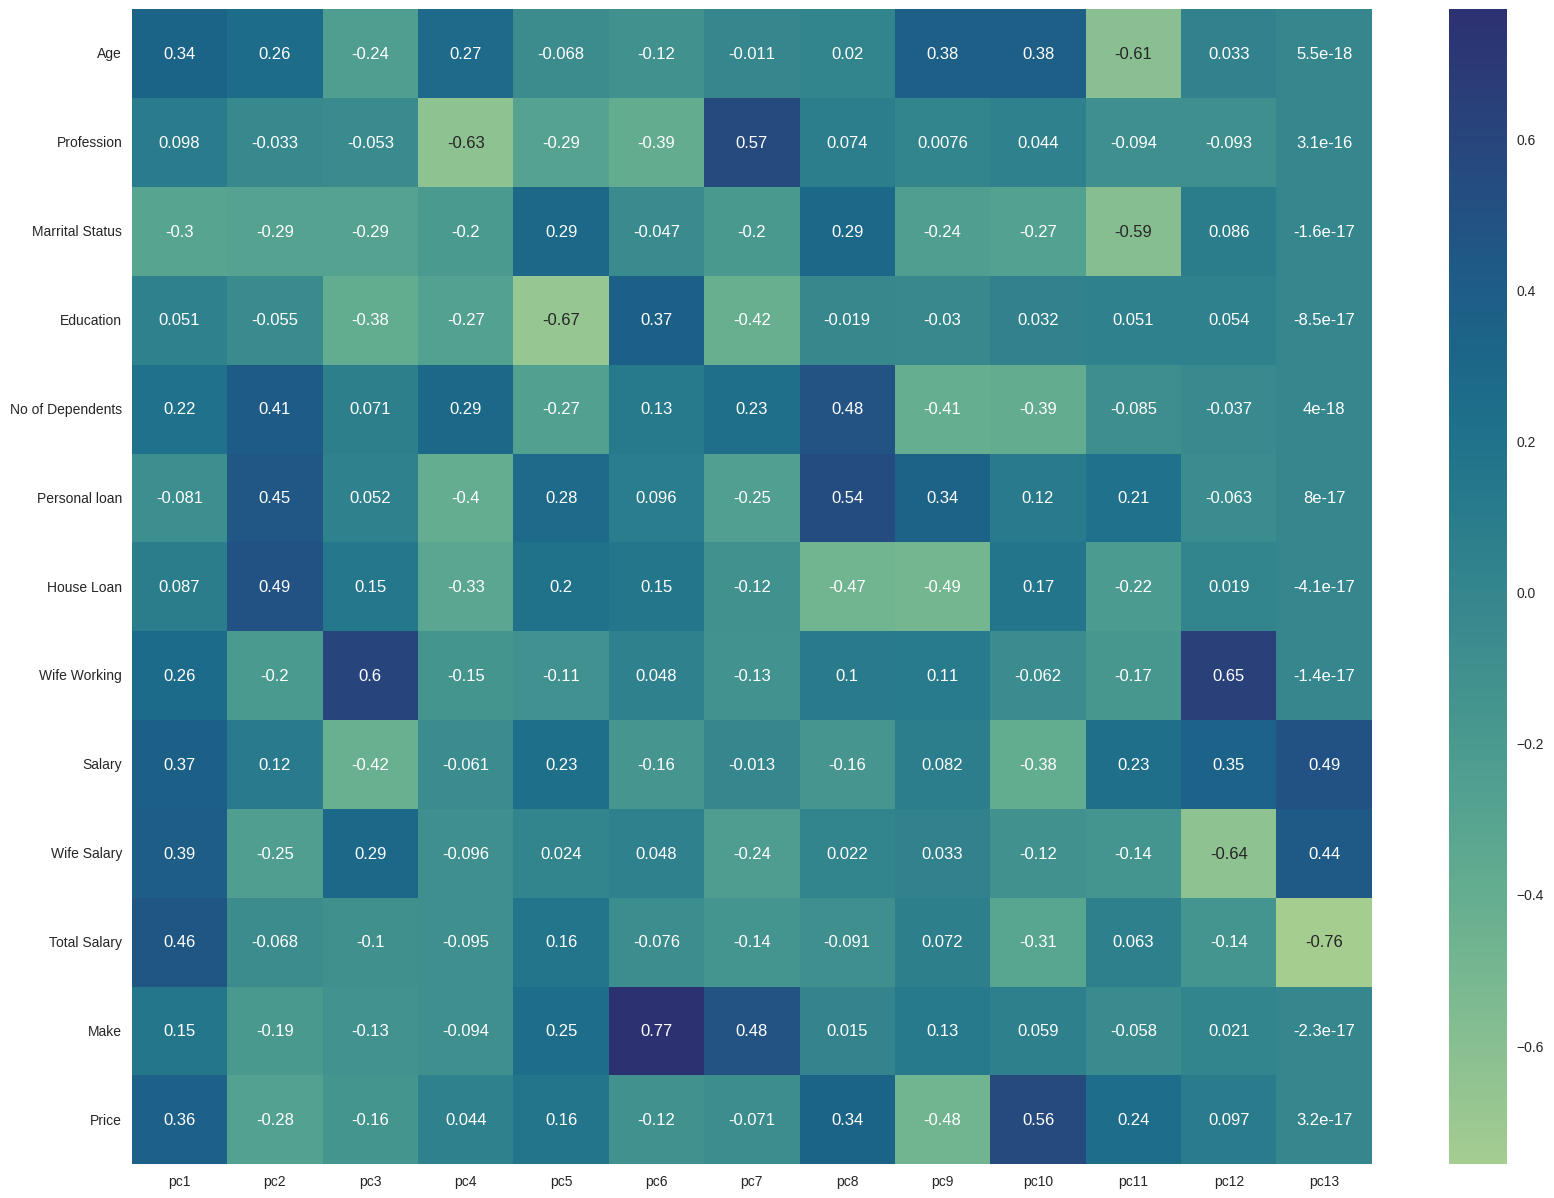

In [78]:
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='crest')
plt.show()

[[-3.50880288e+00 -1.24239492e+00 -1.07087389e+00 ... -3.20854194e-01
  -3.65426035e-01 -2.81002384e-16]
 [-1.88393578e-01  1.28479852e+00  1.03423716e+00 ...  3.26146888e-02
   1.72405094e-01 -4.84601929e-16]
 [-6.29475390e-02  2.87791052e+00 -2.58709369e-01 ... -3.42153396e-01
  -5.70213172e-02 -1.05648529e-16]
 ...
 [ 8.85046735e-02  2.82412491e+00 -7.18182516e-01 ... -6.35012345e-01
   1.37297575e-01  1.05123117e-16]
 [ 3.24733820e+00 -6.71731678e-01 -9.45135590e-01 ... -8.97226981e-01
   1.38727784e-01  1.85506376e-16]
 [ 3.97294367e-01  2.64464706e+00 -1.60509109e+00 ... -7.28939906e-01
   5.17979994e-02 -2.06667212e-16]]


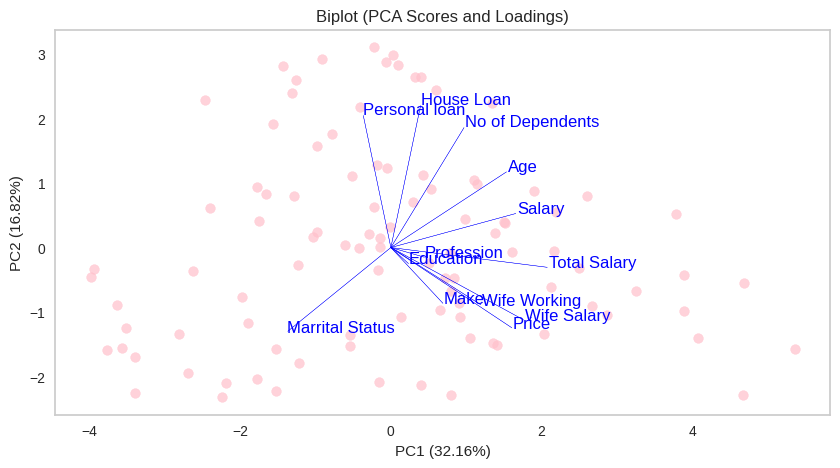

In [79]:
pca_scores = PCA().fit_transform(standardized_data)
print (pca_scores)

#IN THE REPORT, A BIPLOT HAS MENTIONED THE ROLE OF CHEAP, EXPENSIVE FEATURES.
plt.figure(figsize=(10, 5))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], alpha=0.7, color='pink')

for i, variable in enumerate(df_encoded.columns.values):
    plt.arrow(0, 0, loadings[0, i]*4.5, loadings[1, i]*4.5, color='blue', alpha=0.7)
    plt.text(loadings[0, i] * 4.55, loadings[1, i] * 4.55, variable, color='blue')
#Using arrows and scatterplot to create a biplot.
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.title('Biplot (PCA Scores and Loadings)')

plt.grid()
plt.show()

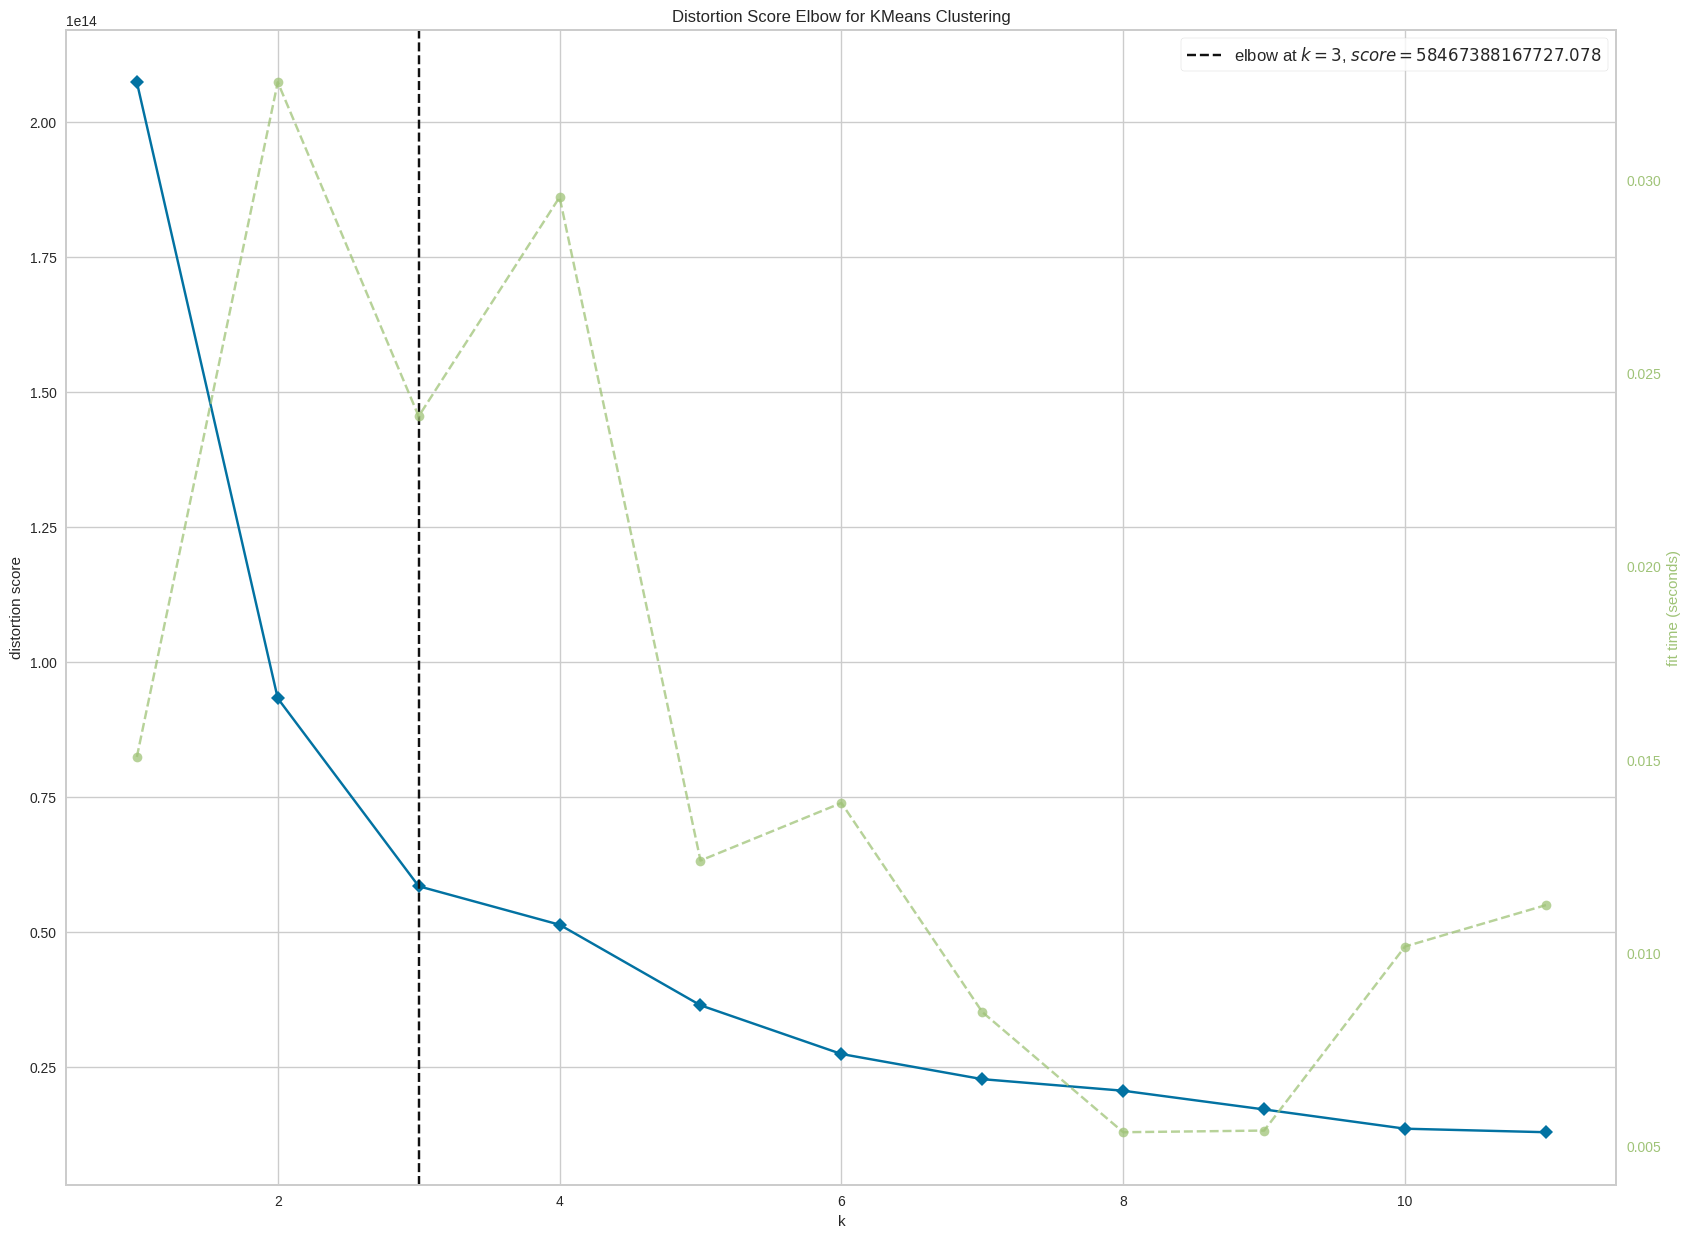

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [80]:
#STEP 5---EXTRACTING SEGMENTS
model=KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_encoded)
visualizer.show()

In [81]:
from collections import Counter
#USING K-MEANS WITH THE RESULTED ELBOW METHOD NUMBER OF CLUSTERS
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df_encoded)
df_encoded['cluster_num'] = kmeans.labels_
behaviour['cluster_num'] = kmeans.labels_
print('Cluster size: ', Counter(kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster size:  Counter({2: 43, 0: 41, 1: 15})


<ipython-input-82-6ca30e4629be>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids",cmap='warmcolor')


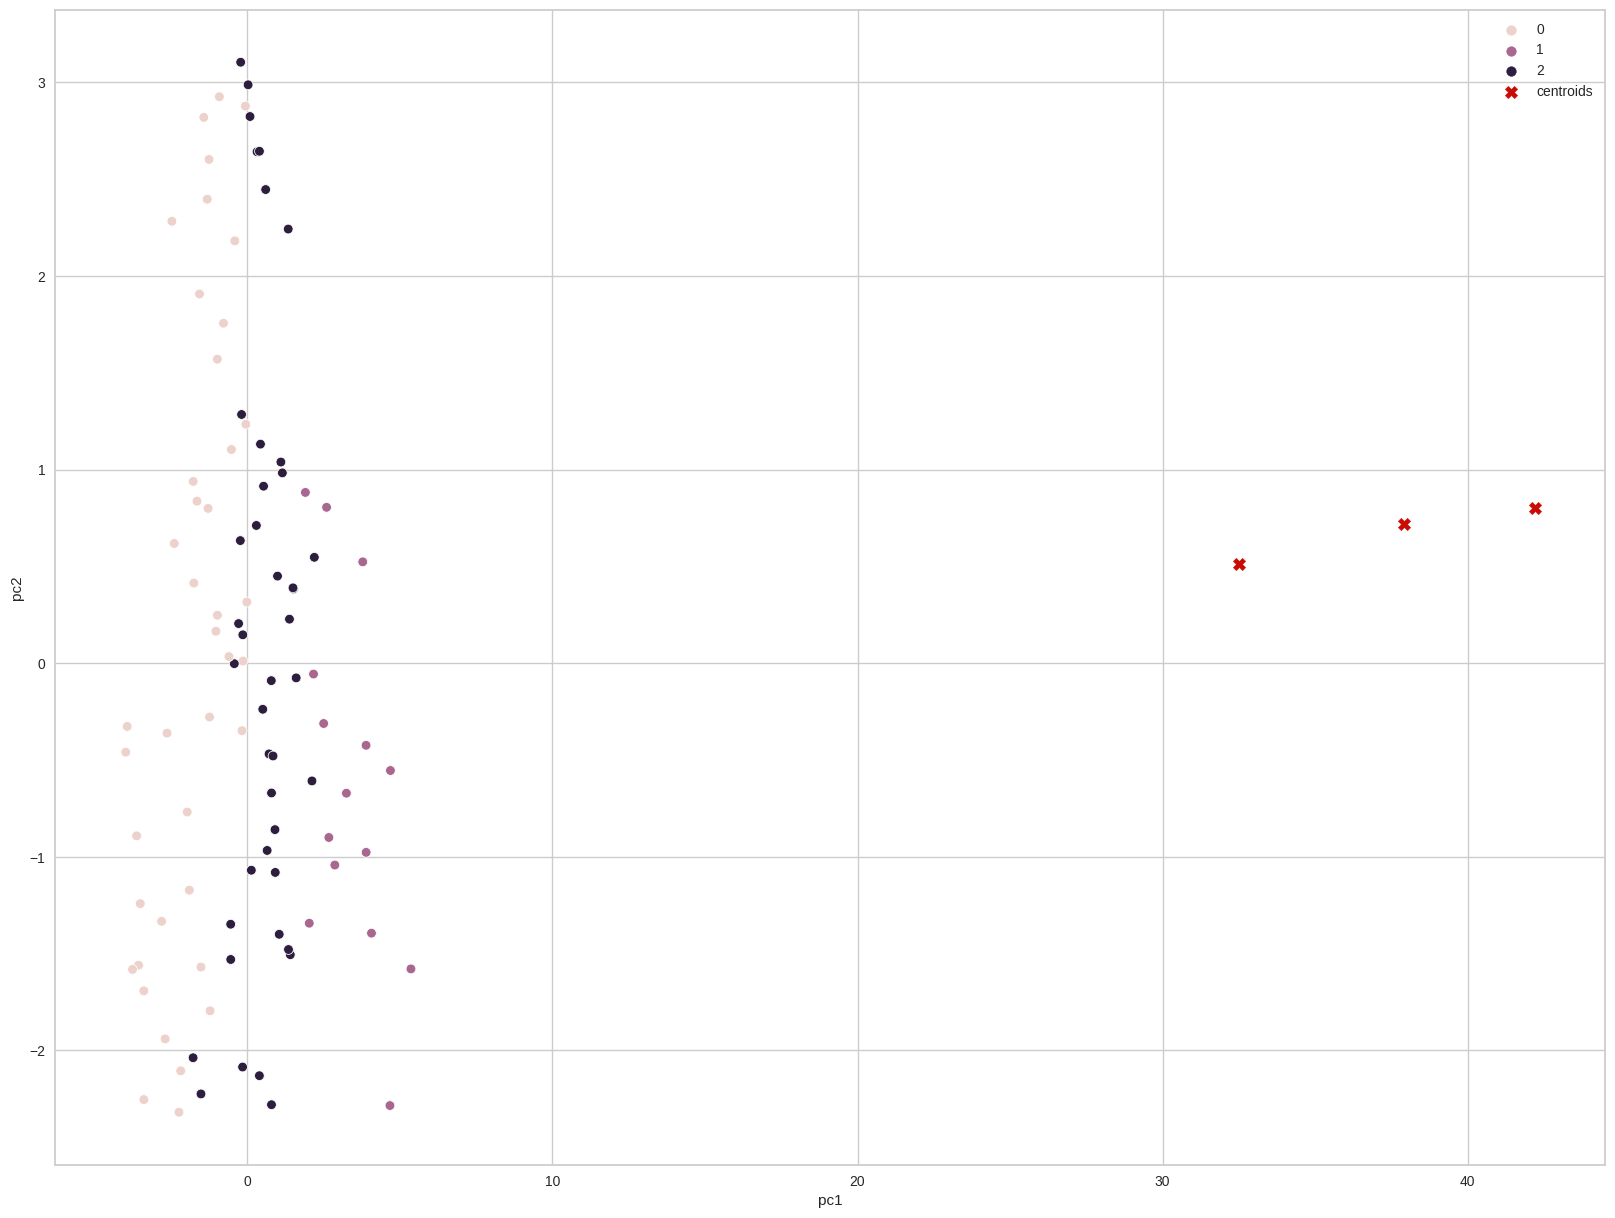

In [82]:
#VISUALISING CLUSTERS
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids",cmap='warmcolor')
plt.legend()
plt.show()

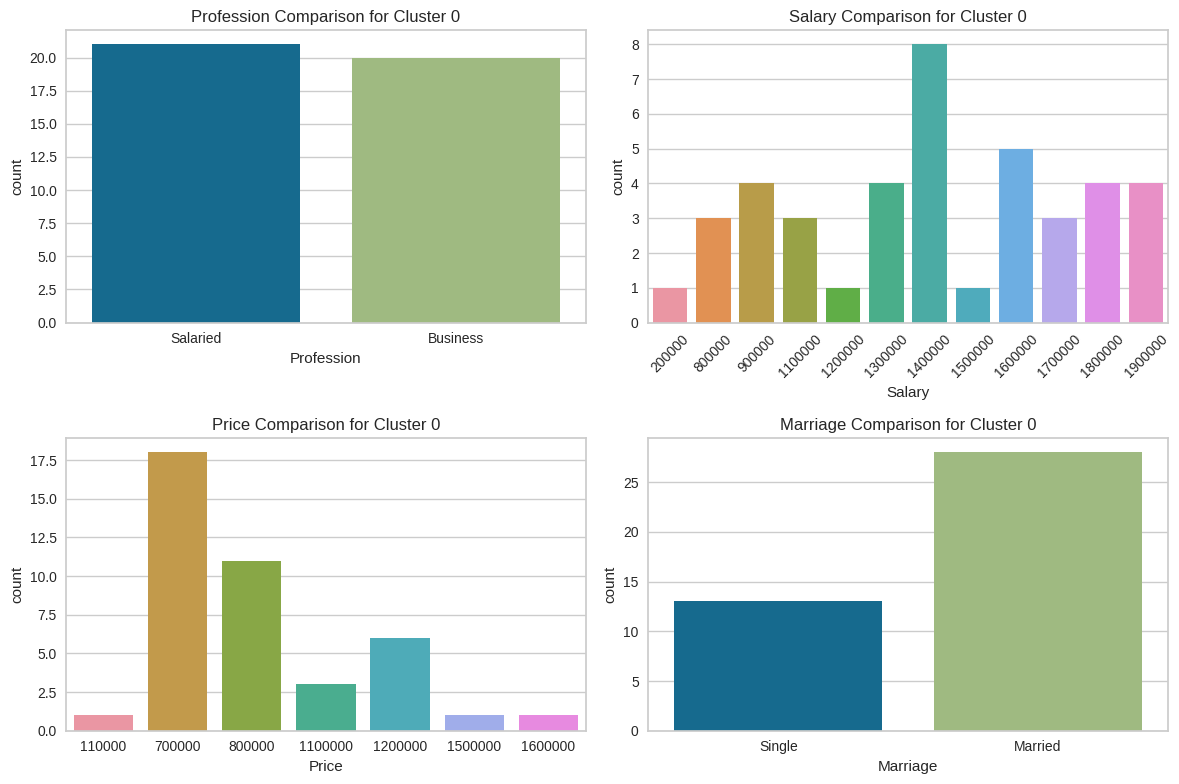

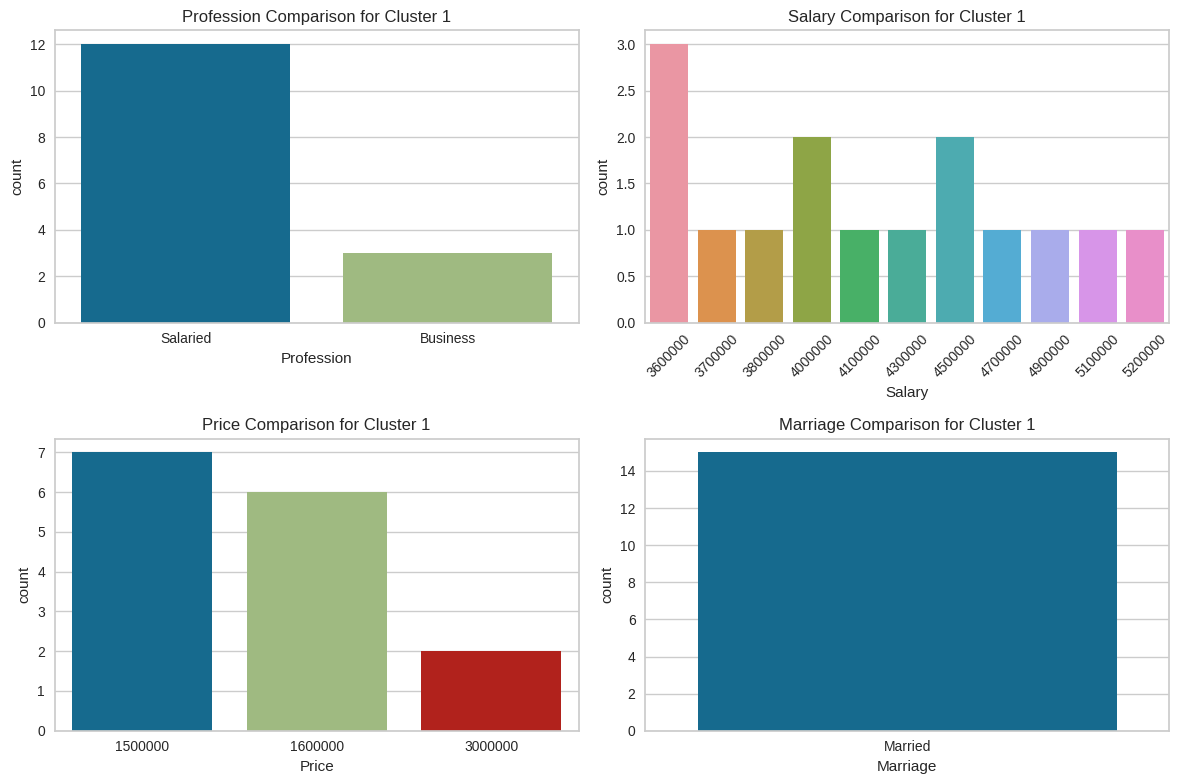

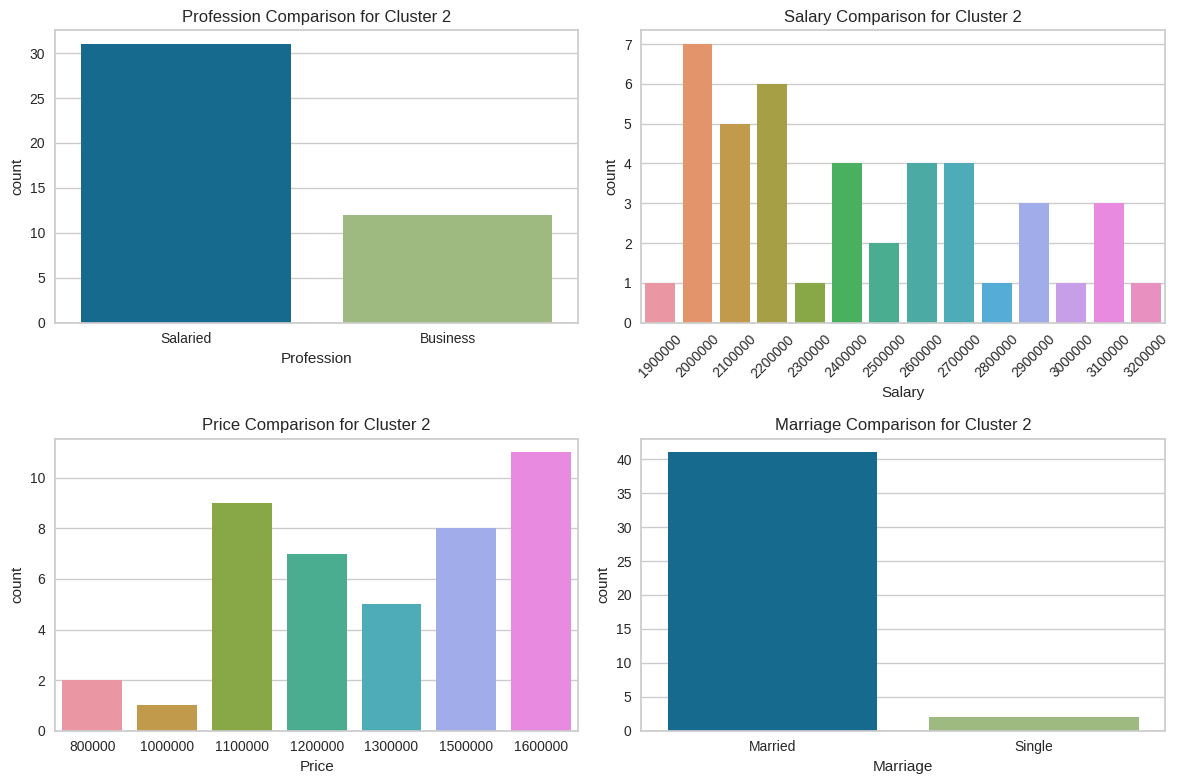

In [83]:
#STUDYING THE MARKET SEGMENTS
df=pd.DataFrame(behaviour)
def compare_cluster(cluster_num):
    cluster_data = df[df_encoded['cluster_num'] == cluster_num]

    plt.figure(figsize=(12, 8))

    # Subplot 1
    plt.subplot(2, 2, 1)
    sns.countplot(x='Profession', data=cluster_data)
    plt.xlabel('Profession')
    plt.title(f'Profession Comparison for Cluster {cluster_num}')

    # Subplot 2
    plt.subplot(2, 2, 2)
    sns.countplot(x='Total Salary', data=cluster_data)
    plt.xlabel('Salary')
    plt.xticks(rotation=45)
    plt.title(f'Salary Comparison for Cluster {cluster_num}')

    # Subplot 3
    plt.subplot(2, 2, 3)
    sns.countplot(x='Price', data=cluster_data)
    plt.xlabel('Price')
    plt.title(f'Price Comparison for Cluster {cluster_num}')

    # Subplot 4
    plt.subplot(2, 2, 4)
    sns.countplot(x='Marrital Status',  data=cluster_data)
    plt.xlabel('Marriage')
    plt.title(f'Marriage Comparison for Cluster {cluster_num}')

    plt.tight_layout()
    plt.show()
for cluster in range(3):
    compare_cluster(cluster)

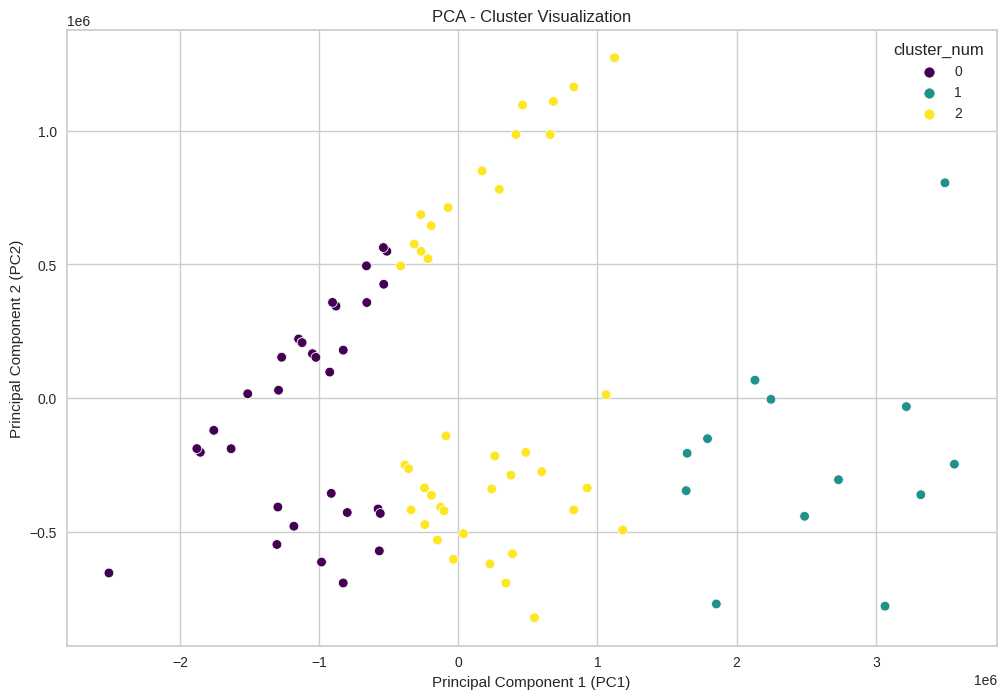

In [84]:
# Apply PCA
features_for_pca = ['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents', 'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary', 'Total Salary', 'Make', 'Price']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_encoded[features_for_pca])

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['cluster_num'] = df_encoded['cluster_num']

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster_num', palette='viridis', legend='full')
plt.title('PCA - Cluster Visualization')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

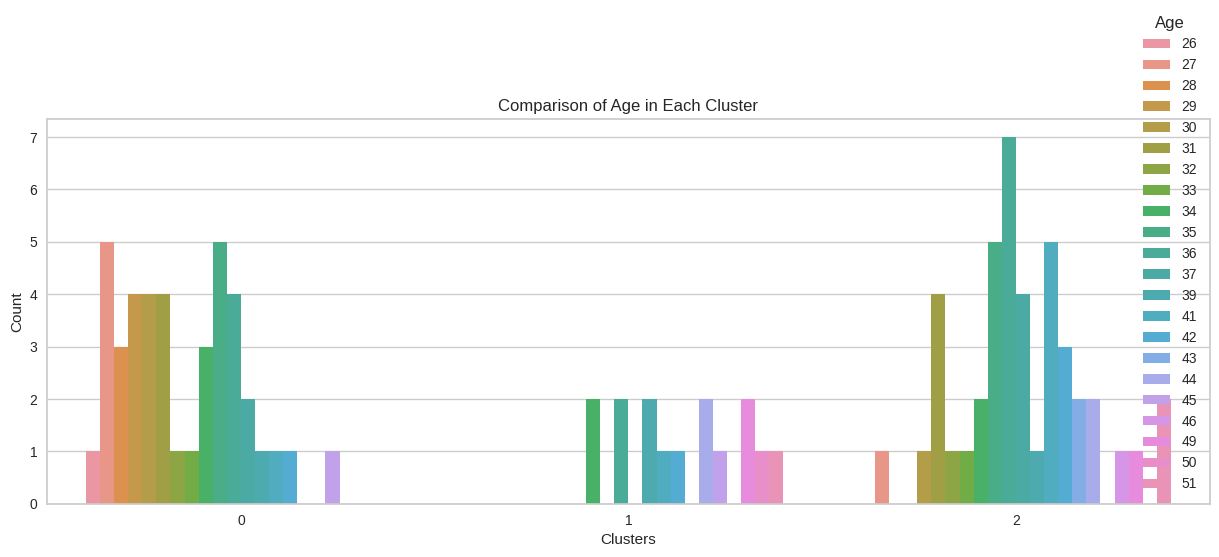

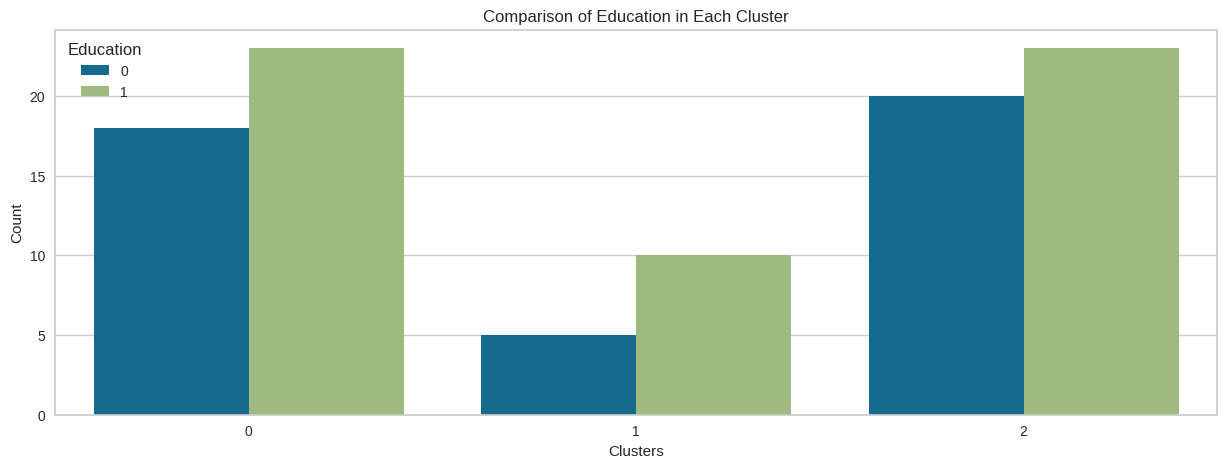

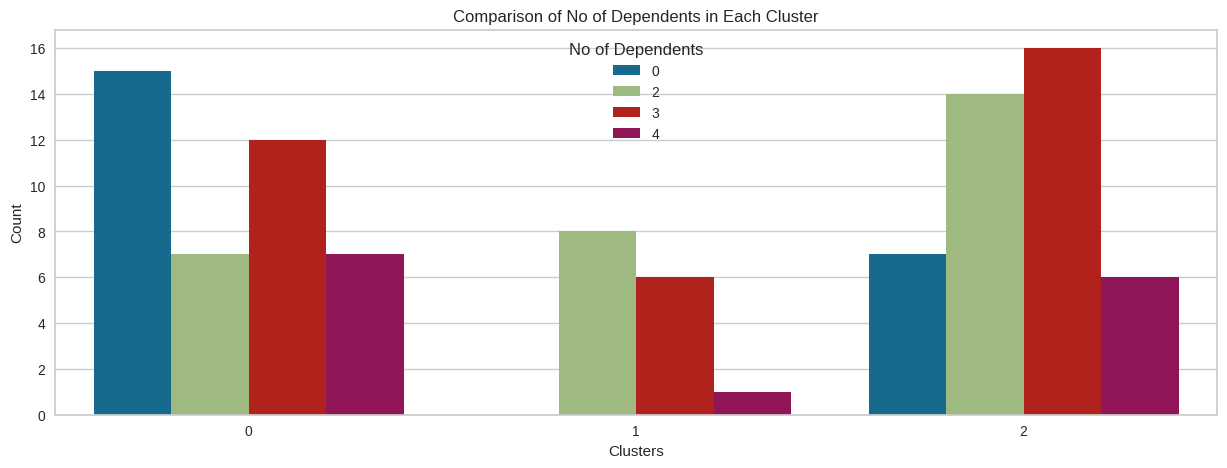

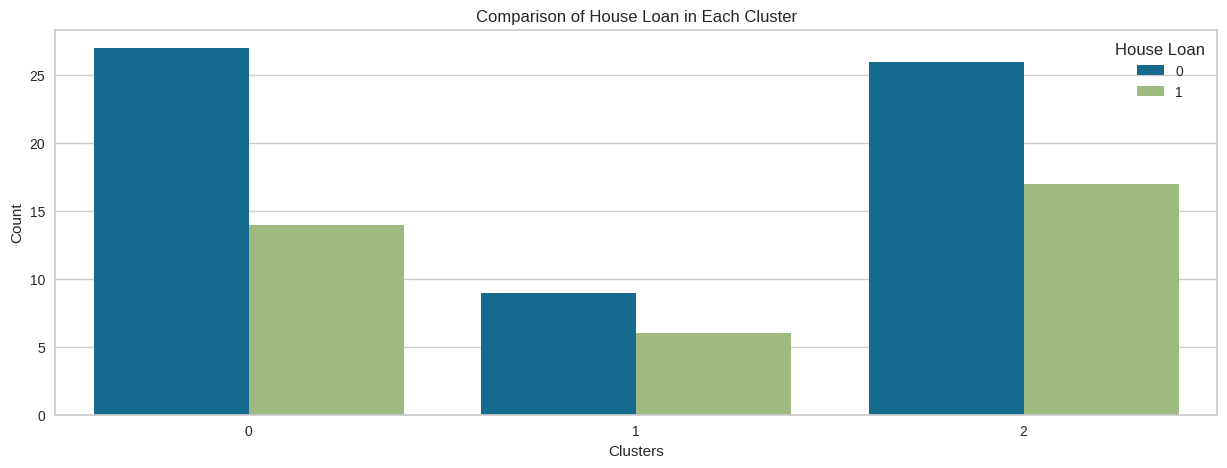

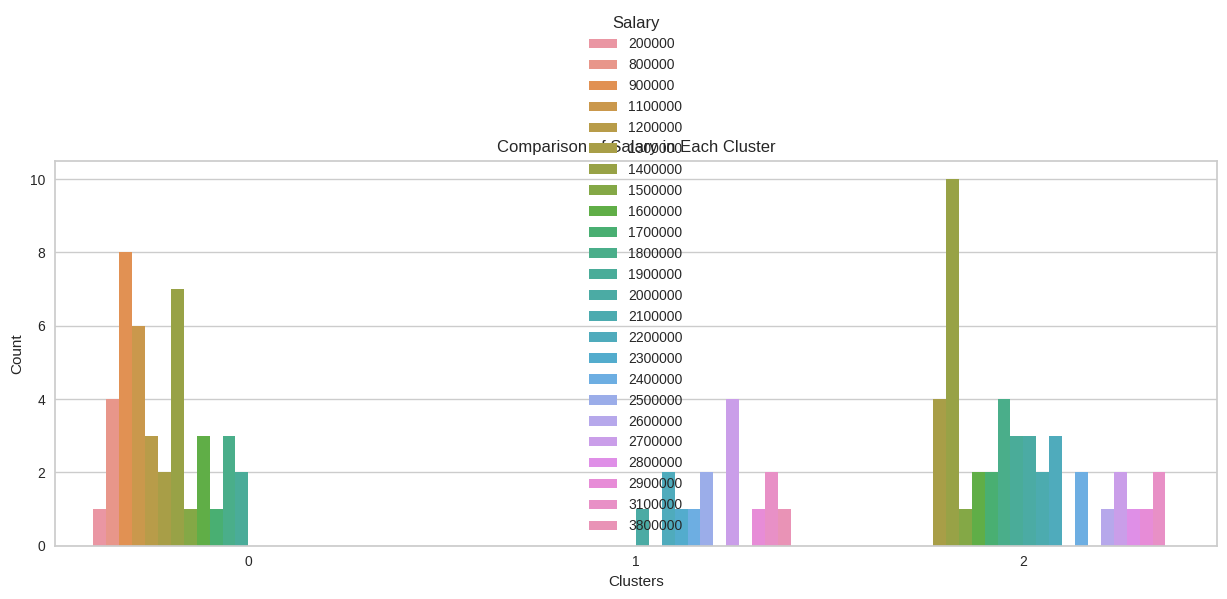

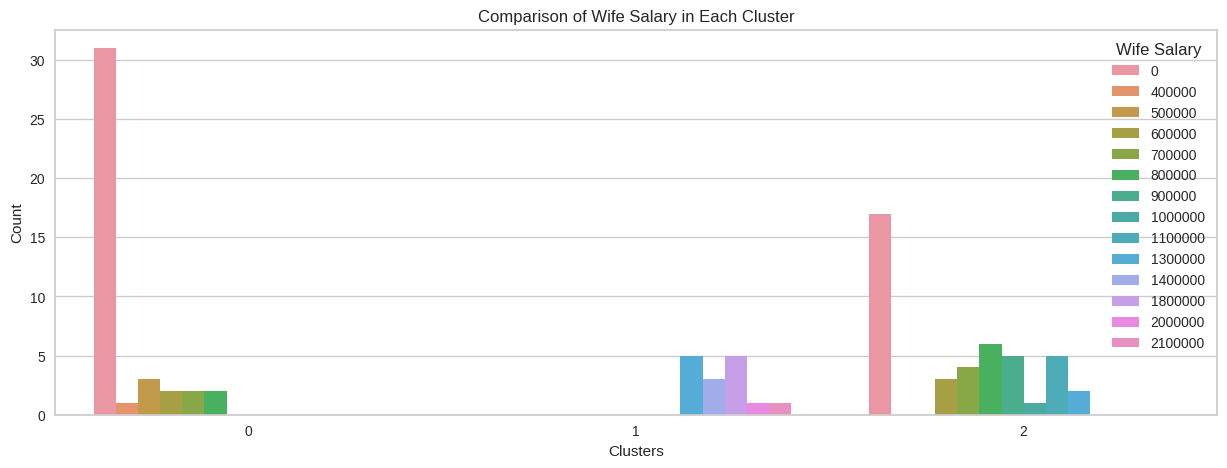

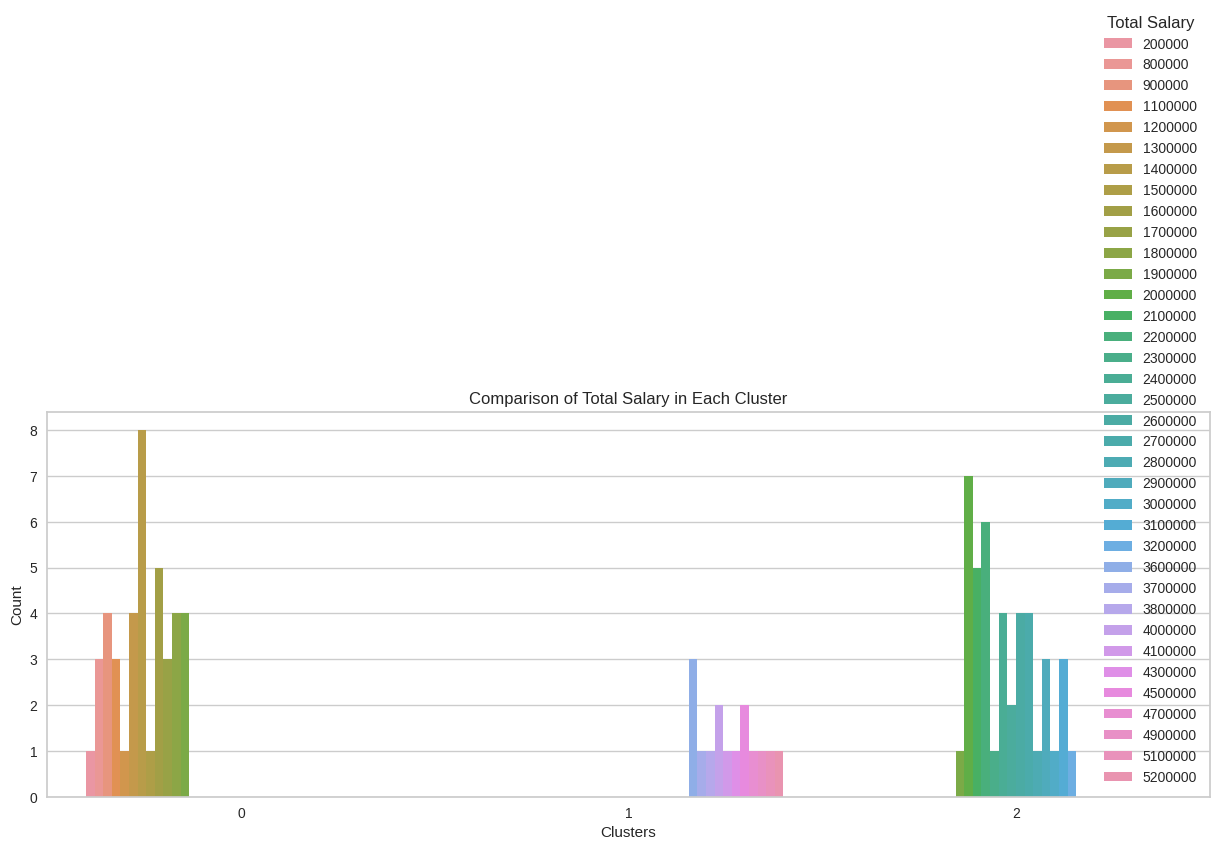

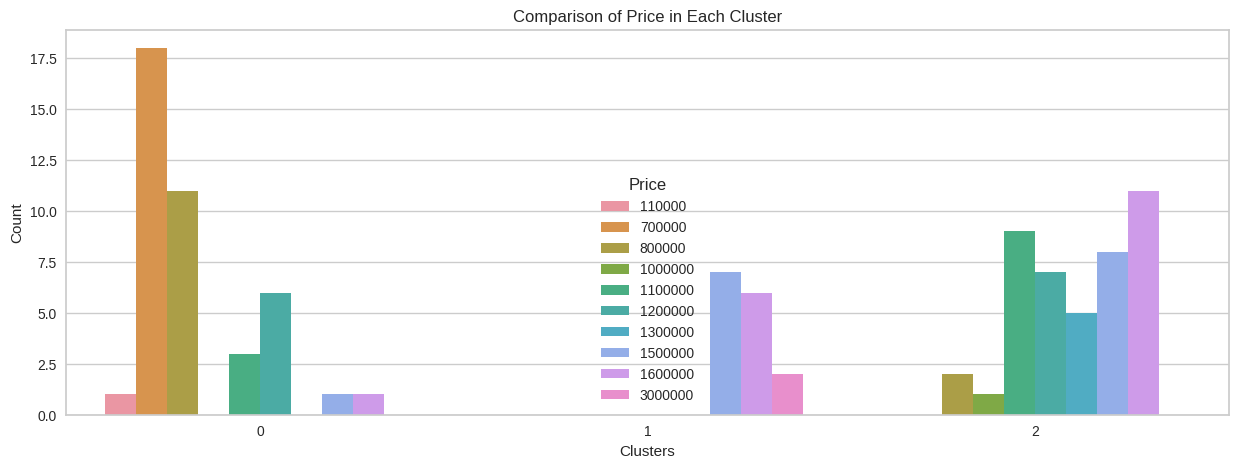

In [85]:
features_for_comparing = ['Age', 'Education', 'No of Dependents',  'House Loan',  'Salary', 'Wife Salary', 'Total Salary', 'Price']
# COMPARING EACH FEATURE IN EACH CLUSTER
for feature in features_for_comparing:
    plt.figure(figsize=(15, 5))
    sns.countplot(x='cluster_num', hue=feature, data=df_encoded)
    plt.title(f'Comparison of {feature} in Each Cluster')
    plt.xlabel('Clusters')
    plt.ylabel('Count')
    plt.show()


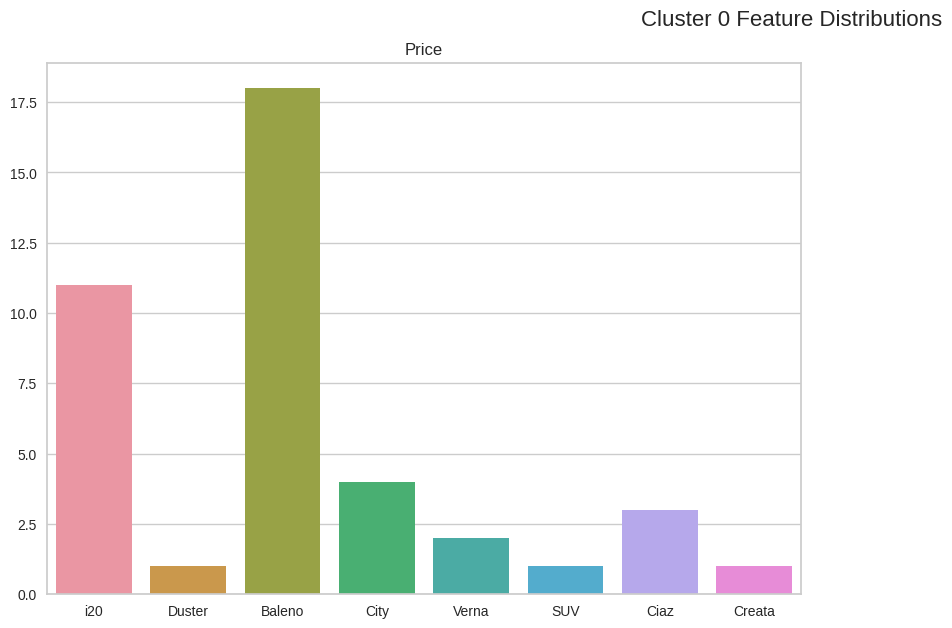

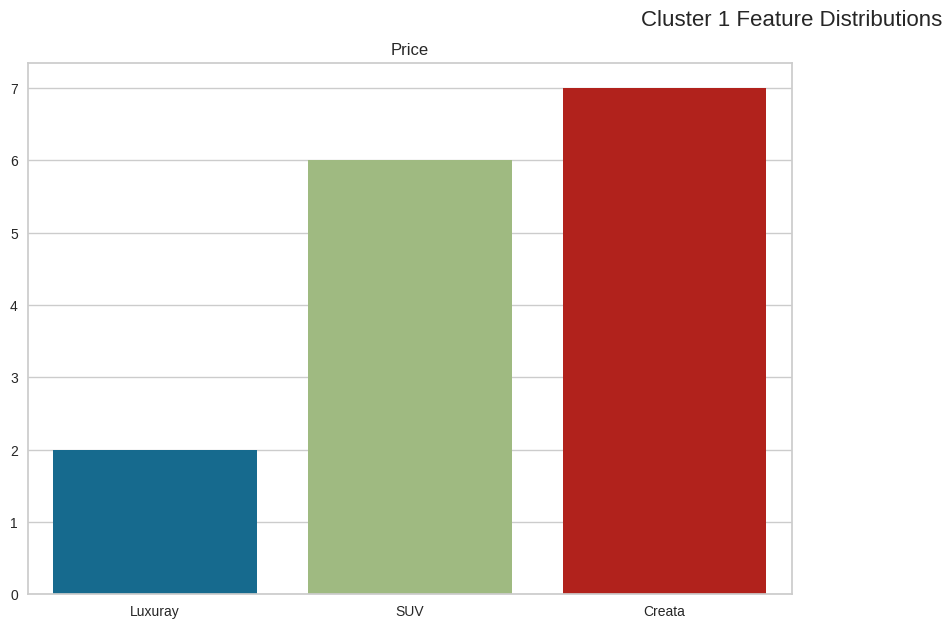

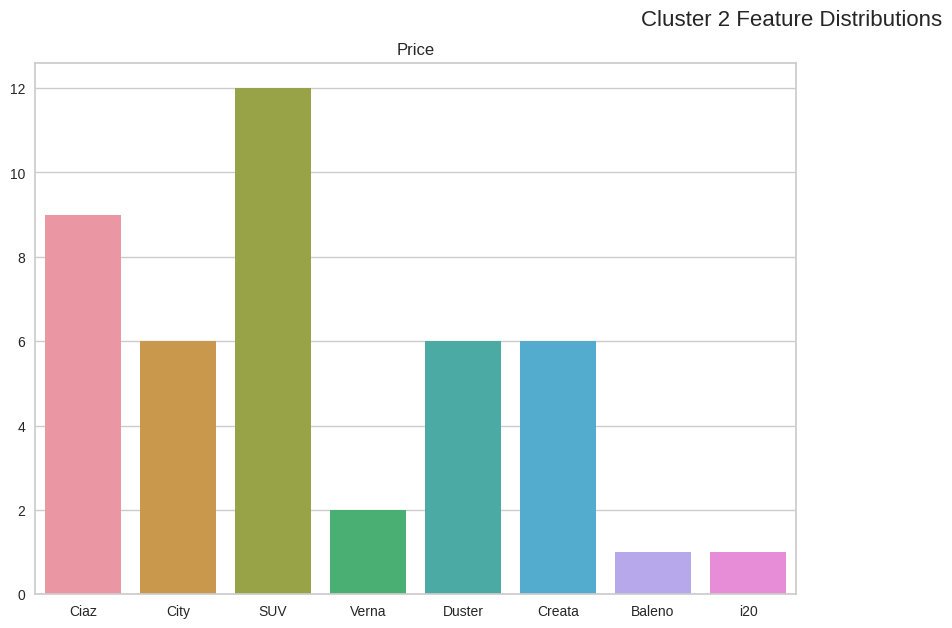

In [86]:
clusters=[0,1,2]
# Create separate bar plots for each feature within each cluster
for cluster in np.sort(clusters):
    plt.figure(figsize=(16, 12))
    plt.suptitle(f'Cluster {cluster} Feature Distributions', fontsize=16)
    plt.subplot(2, 2,  1)  # Adjust the number of rows and columns as needed
    sns.countplot(data=df[df_encoded['cluster_num'] == cluster], x='Make')
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

cluster_num
0    0.512195
1    0.800000
2    0.720930
Name: Profession, dtype: float64
cluster_num
0    3.073171
1    4.466667
2    3.651163
Name: Make, dtype: float64
cluster_num
0    0.414634
1    0.200000
2    0.279070
Name: Personal loan, dtype: float64


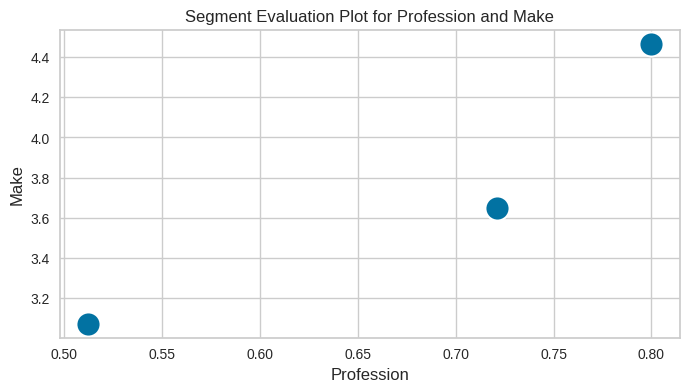

In [87]:
#STEP 8---SELECTING TARGET SEGMENTS

behaviour['Profession'], behaviour['Make'], behaviour['Personal loan'] = LabelEncoder().fit_transform(behaviour['Profession']), LabelEncoder().fit_transform(behaviour['Make']), LabelEncoder().fit_transform(behaviour['Personal loan'])

# Calculate means for each cluster
prof = behaviour.groupby('cluster_num')['Profession'].mean()
make = behaviour.groupby('cluster_num')['Make'].mean()
loan = behaviour.groupby('cluster_num')['Personal loan'].mean()
print (prof)
print (make)
print (loan)

prof_df = pd.DataFrame({'cluster_num': prof.index, 'Profession': prof.values})
make_df = pd.DataFrame({'cluster_num': make.index, 'Make': make.values})
loan_df = pd.DataFrame({'cluster_num': loan.index, 'Personal loan': loan.values})

# Merging DataFrames
combined_df = prof_df.merge(make_df, on='cluster_num').merge(loan_df, on='cluster_num')

plt.figure(figsize=(8, 4))
sns.scatterplot(x='Profession', y='Make', data=combined_df, s=300)
plt.title("Segment Evaluation Plot for Profession and Make", fontsize=12)
plt.xlabel("Profession", fontsize=12)
plt.ylabel("Make", fontsize=12)
plt.show()


In [88]:
###
#DATASET 2(Statewise EV) and 3(Charging Stations in India)
###

                      State      EV
0  Andaman & Nicobar Island     186
1            Andhra Pradesh   65000
2         Arunachal Pradesh      25
3                     Assam  116605
4                     Bihar  155457


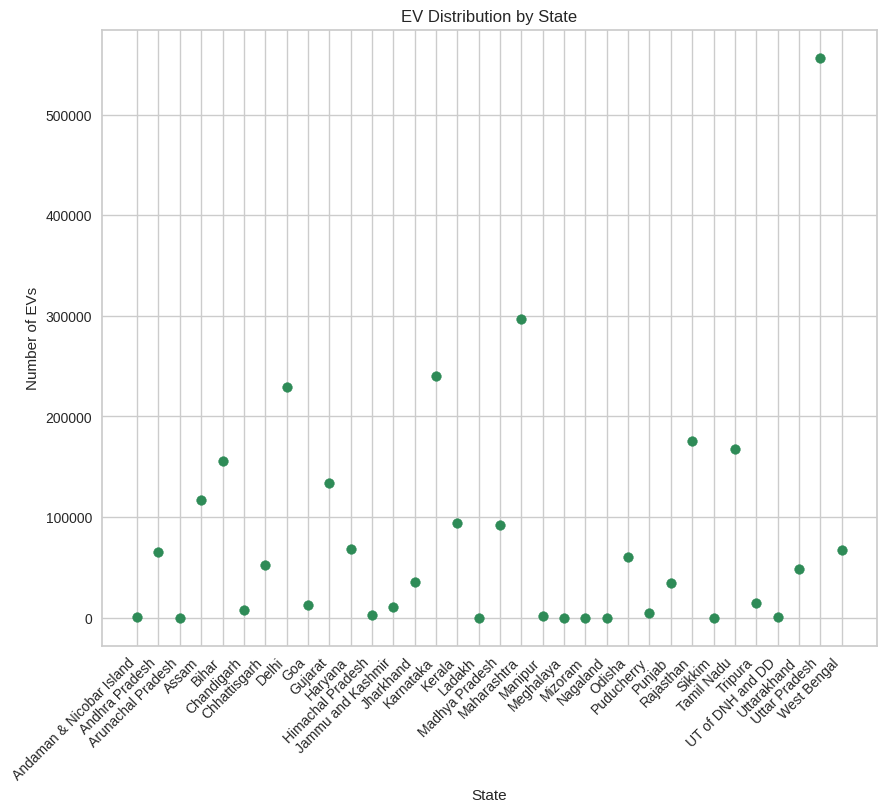

In [89]:
#Exploring the geographical dataset: Shows the number of Electriv Vehicles including 2w and 4w (heavy,medium or light)
print (geographical_ev.head())
plt.figure(figsize=(10, 8))
plt.scatter(geographical_ev['State'], geographical_ev['EV'], color='seagreen')
plt.title('EV Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45, ha='right')
plt.show()


  region  state                                            address   latitude  \
0   NDMC  Delhi  Prithviraj Market, Rabindra Nagar, New Delhi- ...  28.600725   
1   NDMC  Delhi  Prithviraj Market, Rabindra Nagar, New Delhi- ...  28.600725   
2   NDMC  Delhi  Outside RWA Park, Jor Bagh Market, Jor Bagh Co...  28.588303   
3   NDMC  Delhi  Opposite Dory Pharmacy, Khanna Market, Aliganj...  28.582654   
4   NDMC  Delhi  Opposite Goel Opticals, Khanna Market, Aliganj...  28.584485   

   longitude    type  power  
0  77.226252  DC-001     15  
1  77.226252  DC-001     15  
2  77.217697  DC-001     15  
3  77.220087  DC-001     15  
4  77.220316  DC-001     15  


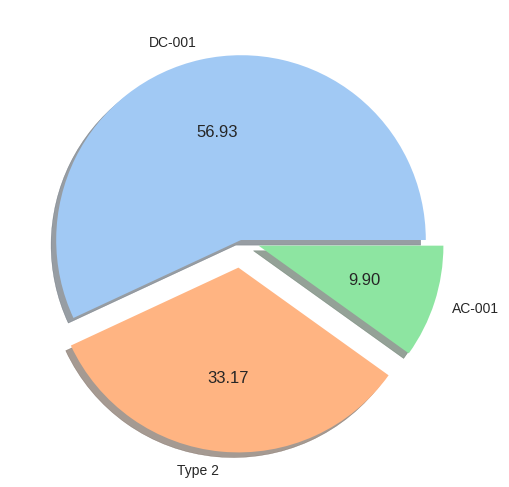

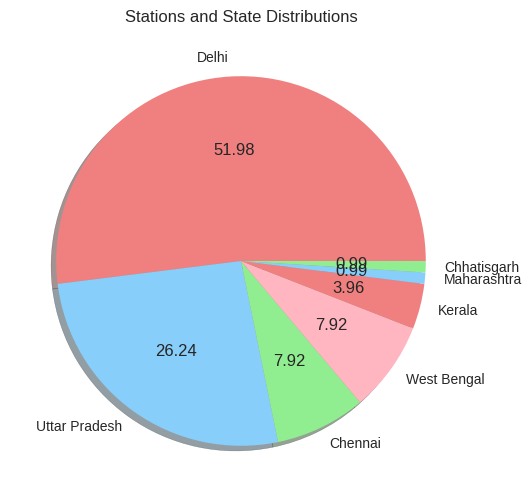

In [90]:
colors1=['lightcoral', 'lightskyblue', 'lightgreen', 'lightpink']
colors2=sns.color_palette("pastel")
#Exploring Charging Stations in some of India's states.
type_freq=charging_stations['type'].value_counts(normalize=True) * 100
print (charging_stations.head(5))
plt.figure(figsize=(8,6))
plt.pie(type_freq,labels=type_freq.index,autopct='%0.2f',explode=[0,0.15,0.1],shadow=True, colors=colors2)
plt.show()

state_freq=charging_stations['state'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
plt.pie( state_freq,labels=state_freq.index, autopct='%0.2f',shadow=True, colors=colors1)
plt.title('Stations and State Distributions')
plt.show()


In [91]:

df = charging_stations.copy()
df_encoded= (df.drop(['address'],axis=1))
df_encoded


,region,state,latitude,longitude,type,power
0,NDMC,Delhi,28.600725,77.226252,DC-001,15
1,NDMC,Delhi,28.600725,77.226252,DC-001,15
2,NDMC,Delhi,28.588303,77.217697,DC-001,15
3,NDMC,Delhi,28.582654,77.220087,DC-001,15
4,NDMC,Delhi,28.584485,77.220316,DC-001,15
...,...,...,...,...,...,...
197,ANERT,Kerala,8.491622,76.956247,Type 2,142
198,ANERT,Kerala,8.481051,76.912622,DC-001,15
199,ANERT,Kerala,9.976921,76.277781,DC-001,15
200,ANERT,Kerala,8.491622,76.956247,DC-001,15


     region  state   latitude  longitude  type  power
0         3      2  28.600725  77.226252     1     15
1         3      2  28.600725  77.226252     1     15
2         3      2  28.588303  77.217697     1     15
3         3      2  28.582654  77.220087     1     15
4         3      2  28.584485  77.220316     1     15
..      ...    ...        ...        ...   ...    ...
197       0      3   8.491622  76.956247     2    142
198       0      3   8.481051  76.912622     1     15
199       0      3   9.976921  76.277781     1     15
200       0      3   8.491622  76.956247     1     15
201       7      2  28.557662  77.157684     1     15

[202 rows x 6 columns]


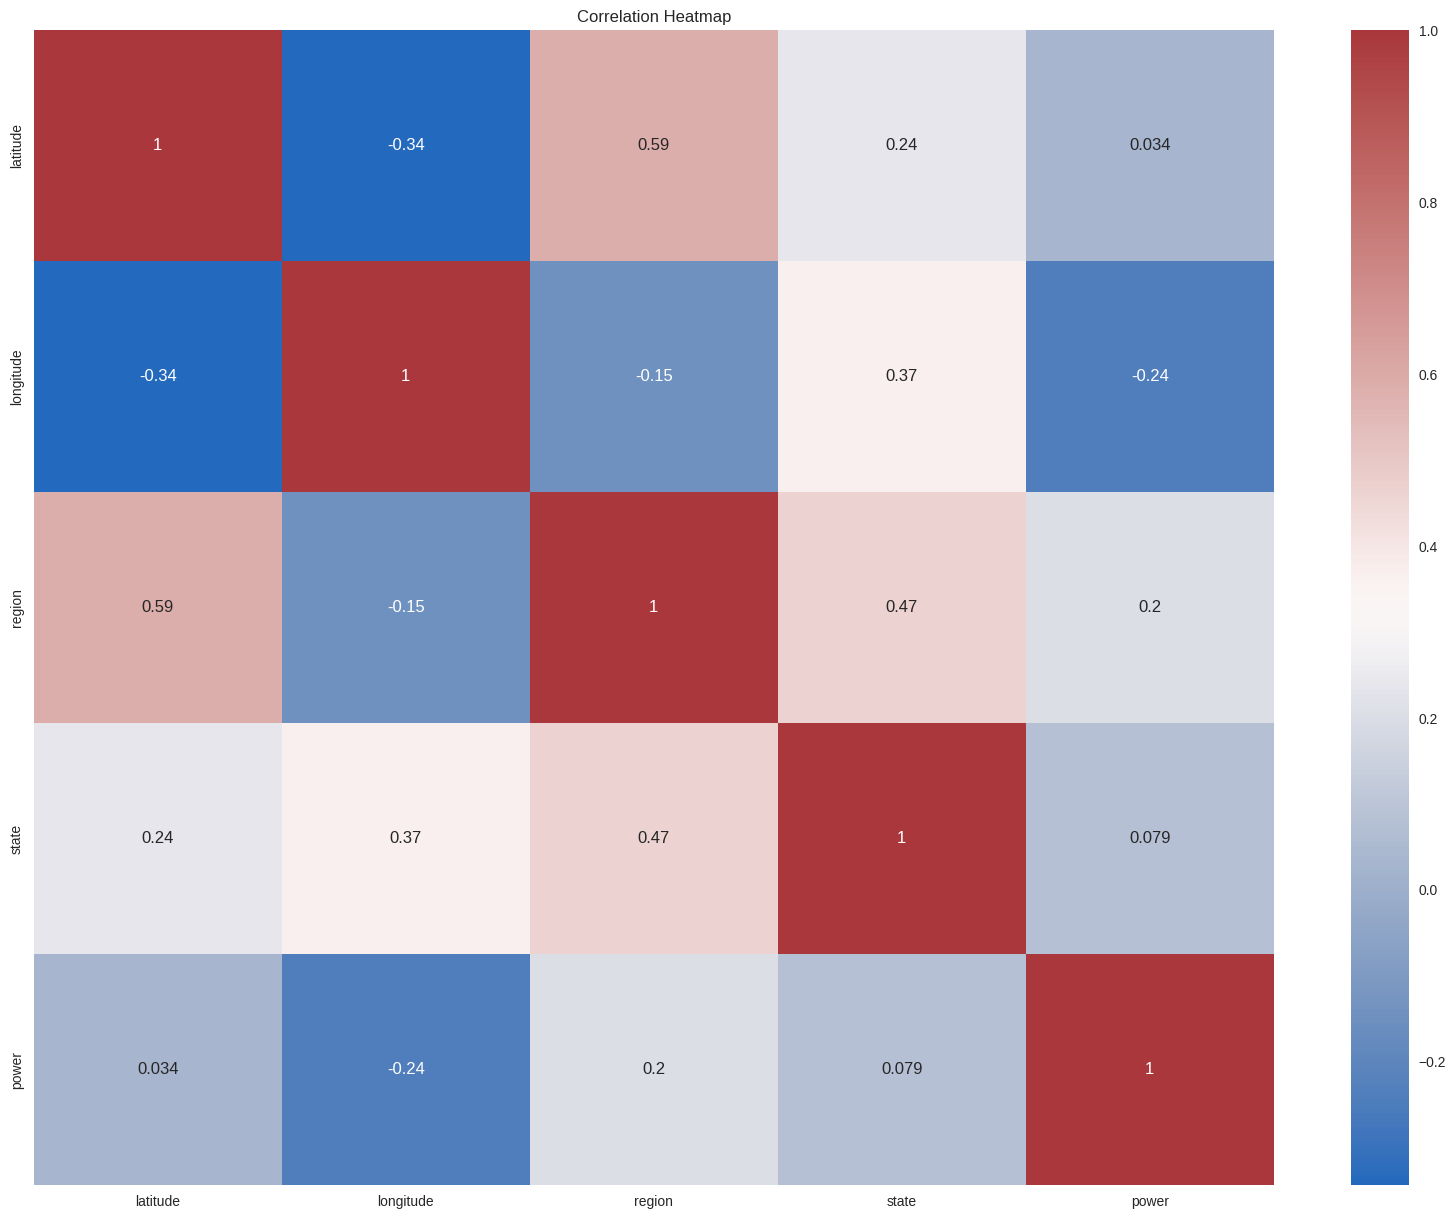

        pc1       pc2       pc3       pc4       pc5       pc6
0  0.571868  0.254111 -1.036844 -0.486924  0.103869 -0.069806
1  0.571868  0.254111 -1.036844 -0.486924  0.103869 -0.069806
2  0.571653  0.255741 -1.037482 -0.484581  0.105865 -0.069853
3  0.572298  0.255946 -1.036567 -0.484122  0.105564 -0.069989
4  0.572207  0.255794 -1.036671 -0.484368  0.105469 -0.069963 

[0.3837889  0.28794397 0.202481   0.0572686  0.05397693 0.01454059]


In [92]:
#FOR PRINCIPAL COMPONENT ANALYSIS
label_encoder = LabelEncoder()

for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
print (df_encoded)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_encoded)

selected_columns = ['latitude','longitude','region','state','power']
data_subset = df_encoded[selected_columns]

correlation_matrix = data_subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='vlag')
plt.title('Correlation Heatmap')
plt.show()

pca = PCA(n_components=6)
pca.fit(standardized_data)

principal_components = pca.transform(standardized_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6']
pf = pd.DataFrame(data = principal_components, columns = names)
print (pf.head(),'\n')

print (pca.explained_variance_ratio_)


In [93]:
loadings_matrix = pca.components_.T

#The loadings indicate how the original variables are combined to form principal components.
loadings = pca.components_
loadings_df = pd.DataFrame(loadings_matrix, columns=names, index=df_encoded.columns)

print("Loadings Matrix:")
print(loadings_df)

explained_variance_ratios = pca.explained_variance_ratio_
print("\nExplained Variance Ratios:")
print(explained_variance_ratios)

Loadings Matrix:
                pc1       pc2       pc3       pc4       pc5       pc6
region    -0.398265 -0.499182 -0.072287  0.643160 -0.414442 -0.039499
state     -0.112763 -0.584388  0.441013 -0.051182  0.664167 -0.086864
latitude  -0.359312 -0.405497 -0.452657 -0.684267 -0.157975  0.091604
longitude  0.365273 -0.263744  0.593119 -0.298225 -0.594233 -0.056332
type      -0.545032  0.325138  0.255739 -0.151906 -0.080660 -0.708690
power     -0.518729  0.263828  0.422126 -0.059089 -0.050446  0.690716

Explained Variance Ratios:
[0.3837889  0.28794397 0.202481   0.0572686  0.05397693 0.01454059]


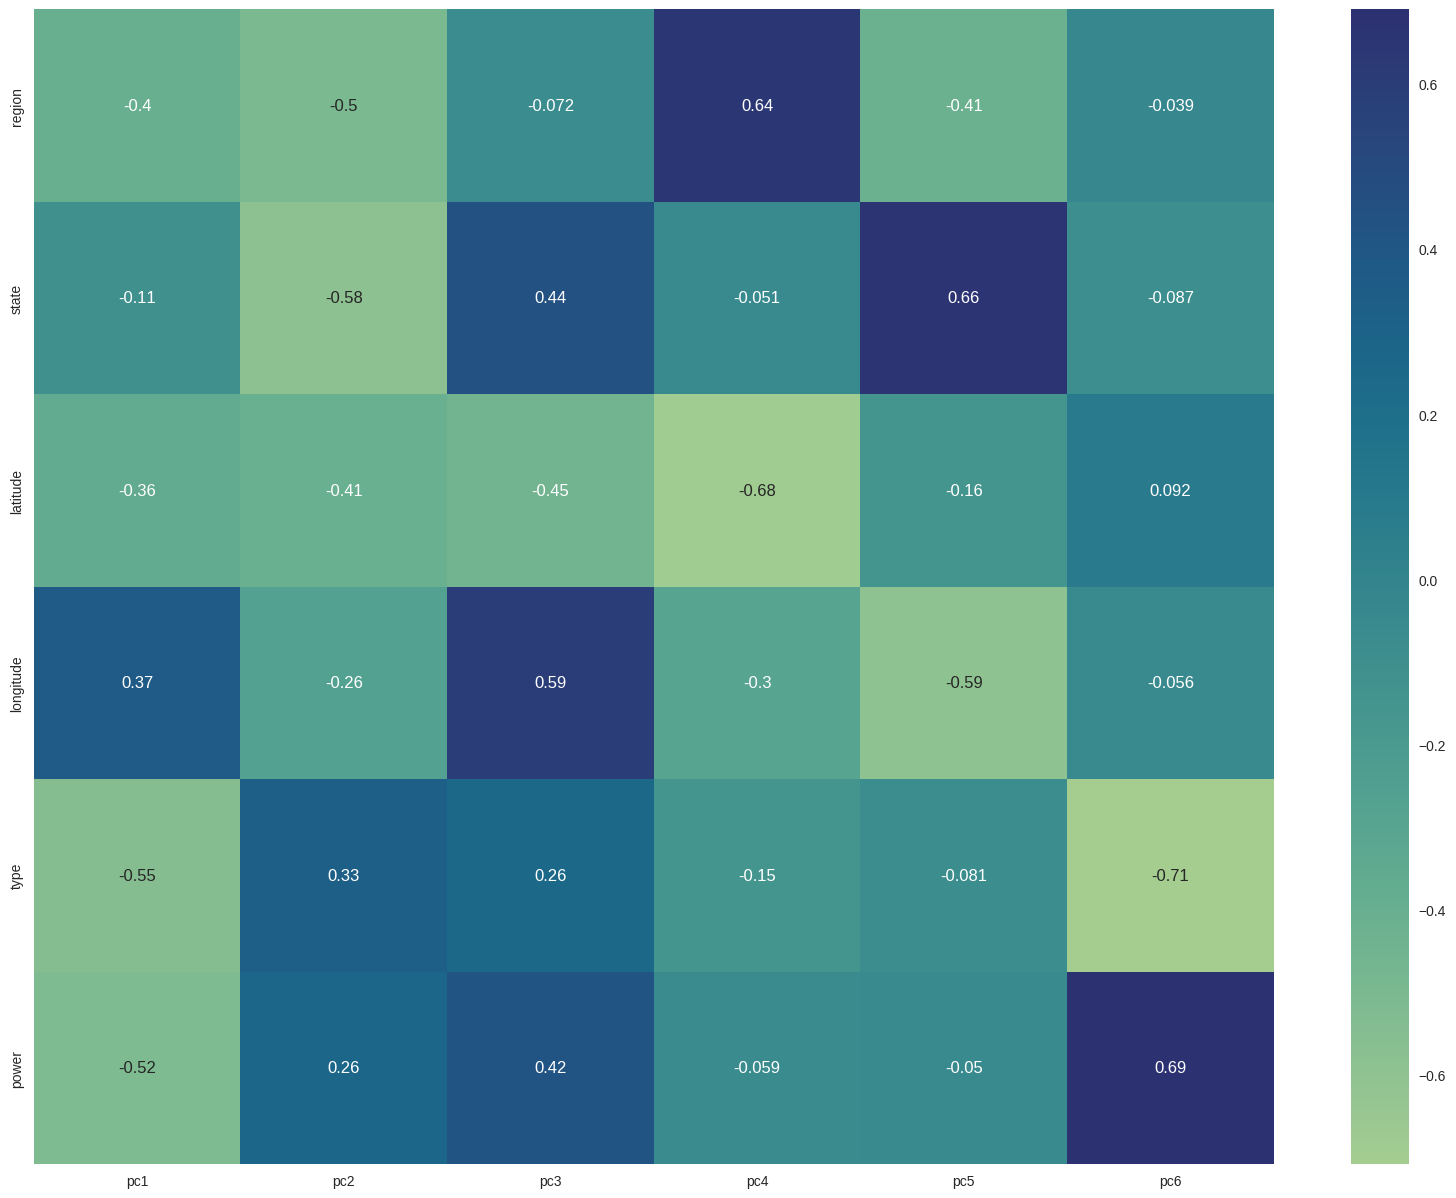

In [94]:

plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='crest')
plt.show()

[[ 0.57186755  0.25411131 -1.03684381 -0.48692436  0.10386907 -0.06980556]
 [ 0.57186755  0.25411131 -1.03684381 -0.48692436  0.10386907 -0.06980556]
 [ 0.57165297  0.25574069 -1.03748223 -0.48458136  0.10586461 -0.06985272]
 ...
 [ 2.18883155  2.09922808  0.64741464  0.88236317  1.81564028 -0.34739346]
 [ 2.3642981   2.1488267   0.89765754  0.9983005   1.72704869 -0.38404891]
 [-0.23243541 -0.73832766 -1.19154029  0.81519531 -0.71314315 -0.14849941]]


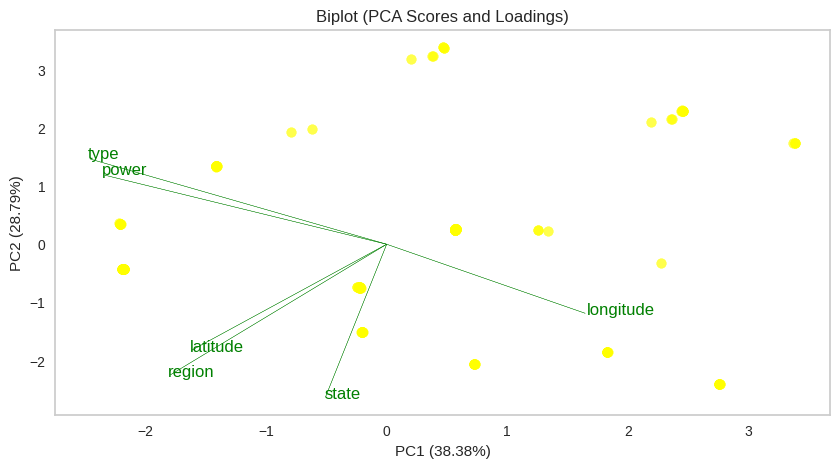

In [95]:
pca_scores = PCA().fit_transform(standardized_data)
print (pca_scores)

#IN THE REPORT, A BIPLOT HAS MENTIONED THE ROLE OF CHEAP, EXPENSIVE FEATURES.
plt.figure(figsize=(10, 5))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], alpha=0.7, color='yellow')

for i, variable in enumerate(df_encoded.columns.values):
    plt.arrow(0, 0, loadings[0, i]*4.5, loadings[1, i]*4.5, color='green', alpha=0.7)
    plt.text(loadings[0, i] * 4.55, loadings[1, i] * 4.55, variable, color='green')
#Using arrows and scatterplot to create a biplot.
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.title('Biplot (PCA Scores and Loadings)')

plt.grid()
plt.show()

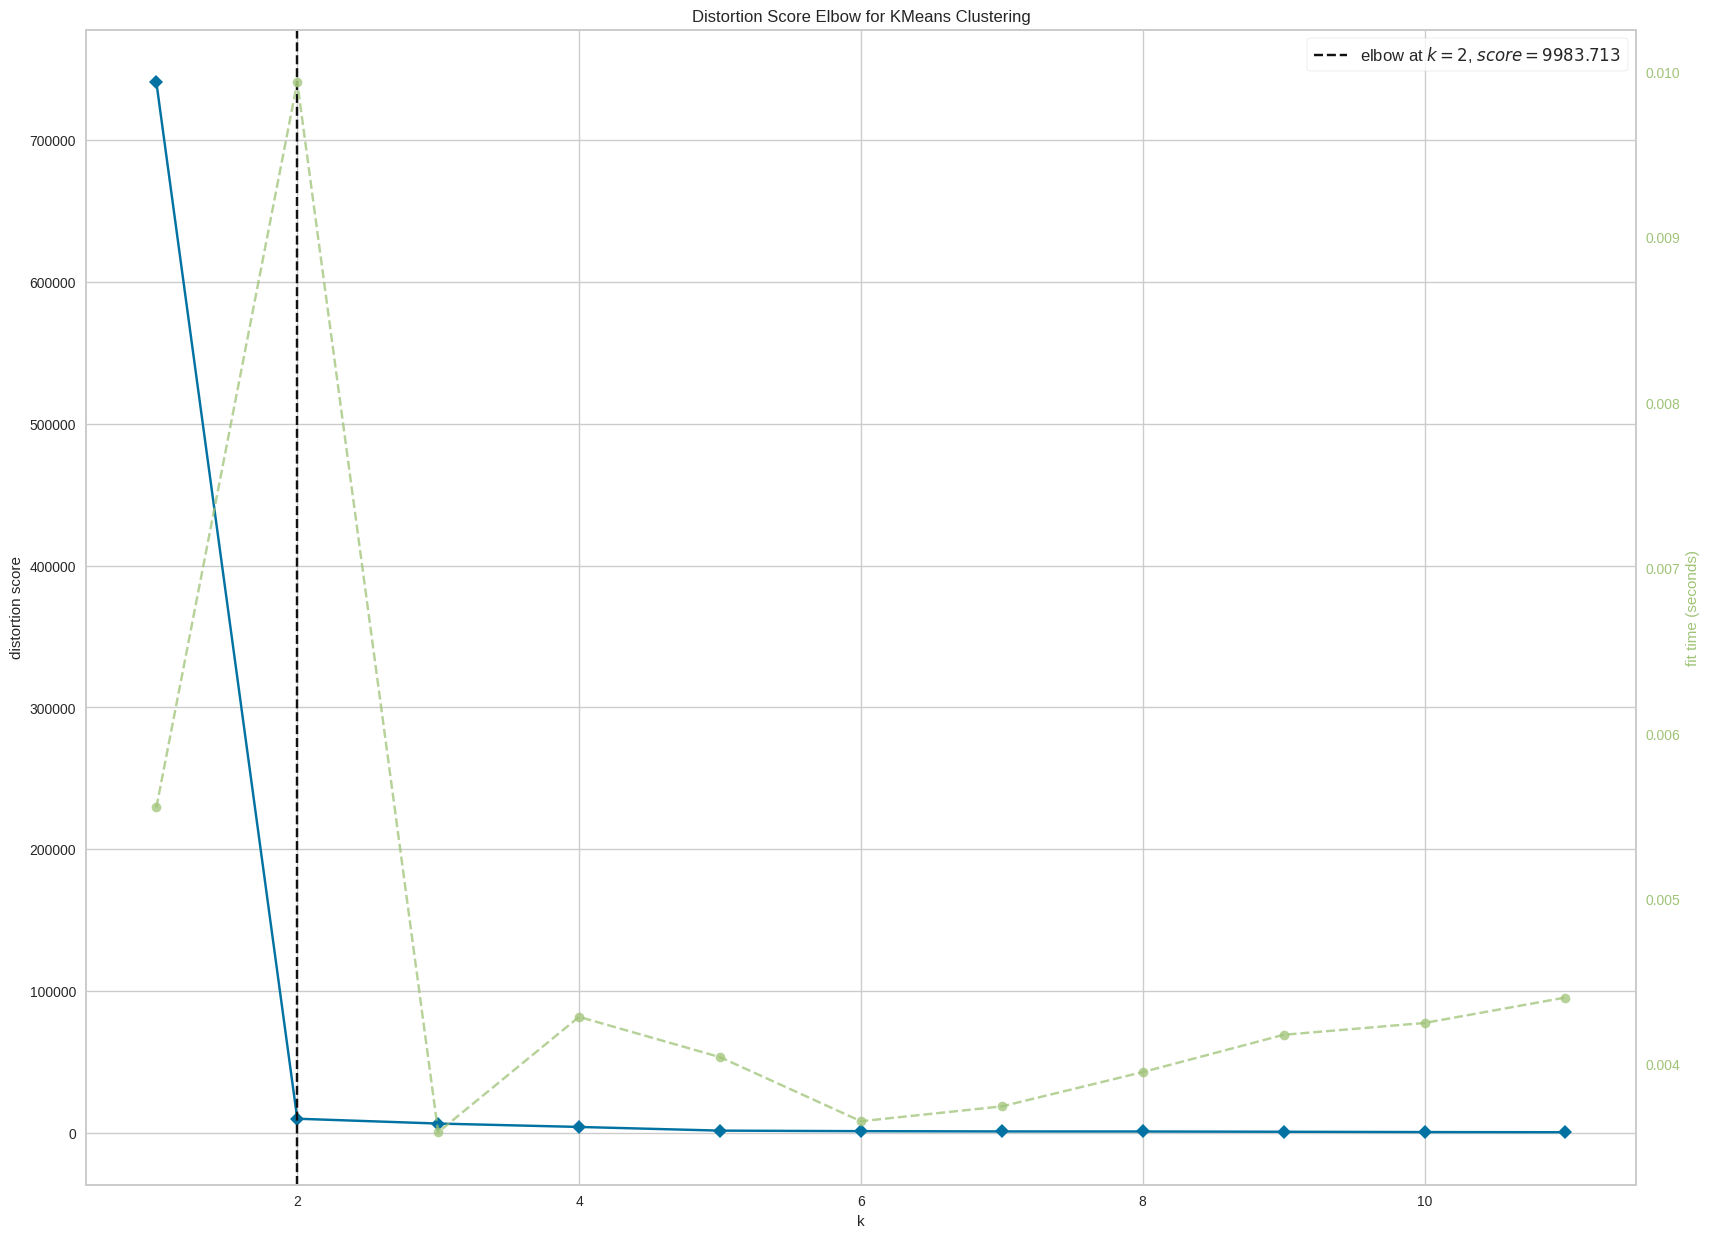

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [96]:
#STEP 5---EXTRACTING SEGMENTS
model=KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_encoded)
visualizer.show()

In [97]:
from collections import Counter
#USING K-MEANS WITH THE RESULTED ELBOW METHOD NUMBER OF CLUSTERS
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(df_encoded)
df_encoded['cluster_num'] = kmeans.labels_
charging_stations['cluster_num'] = kmeans.labels_
print('Cluster size: ', Counter(kmeans.labels_))


Cluster size:  Counter({1: 135, 0: 67})


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-98-6ca30e4629be>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids",cmap='warmcolor')


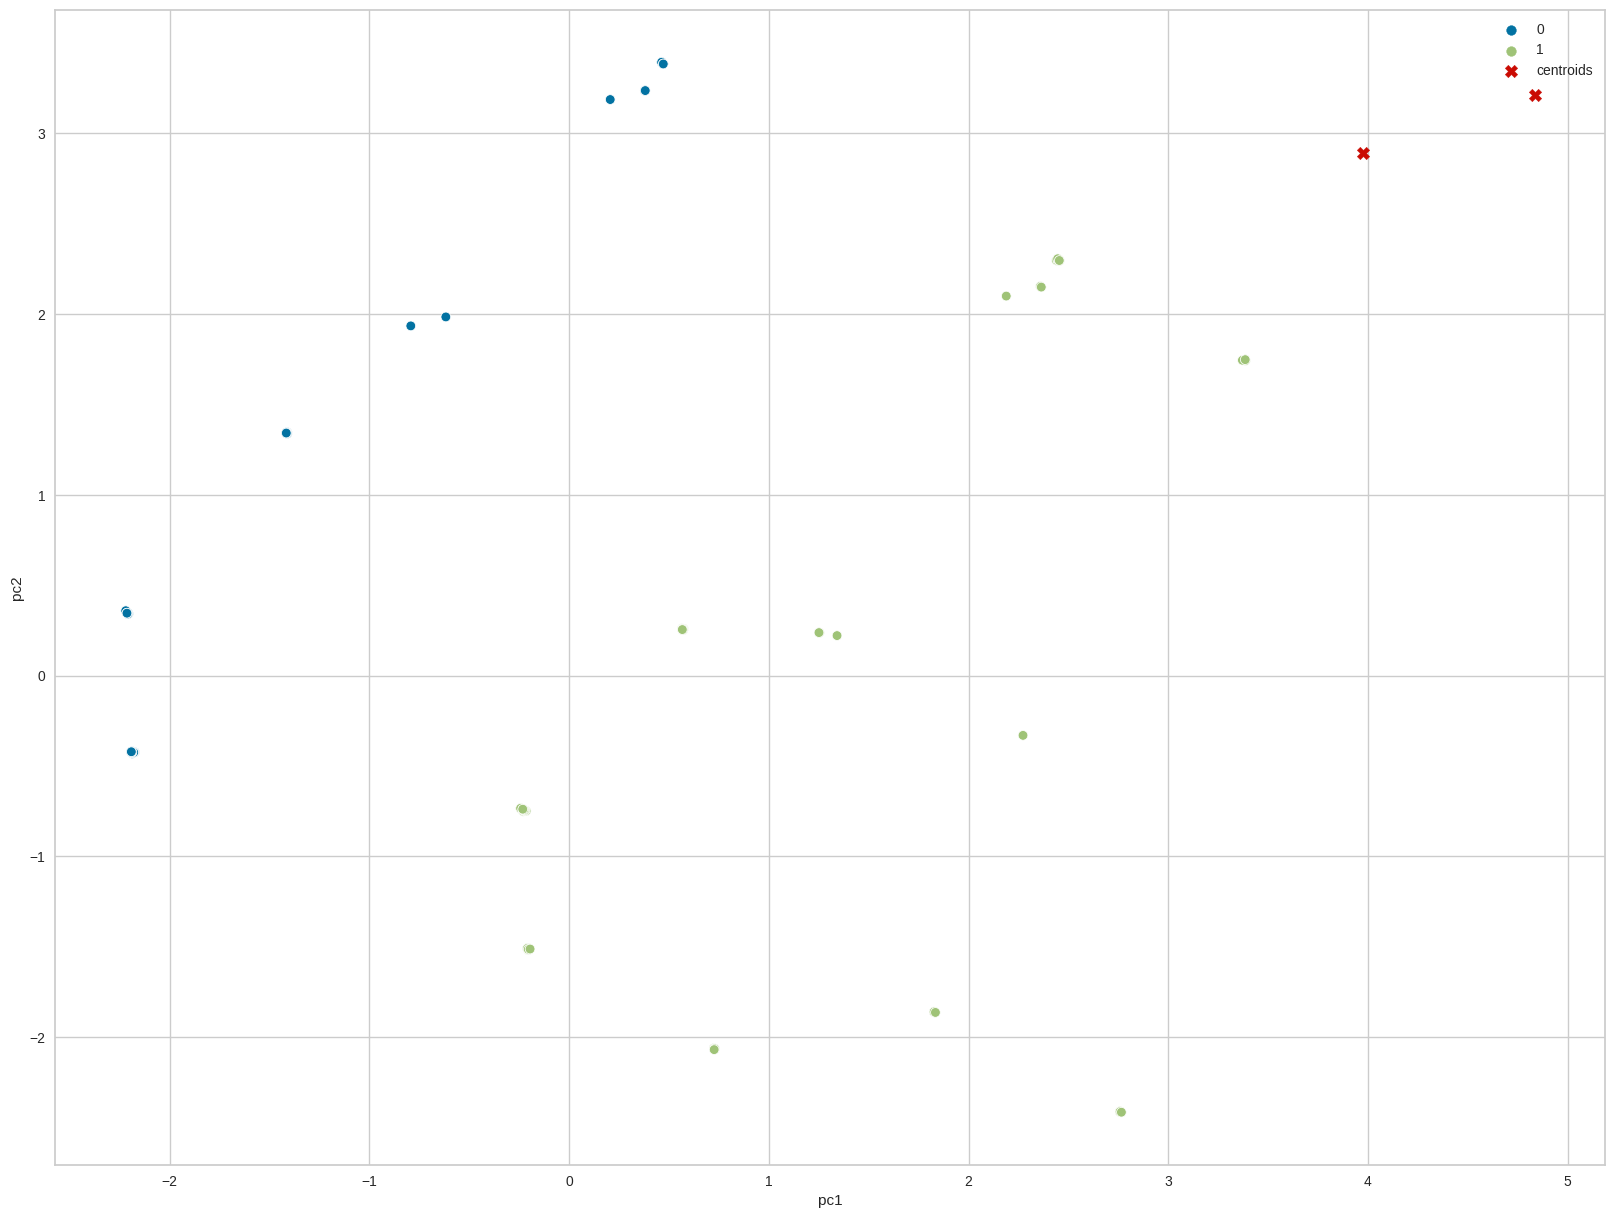

In [98]:
#VISUALISING CLUSTERS
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids",cmap='warmcolor')
plt.legend()
plt.show()

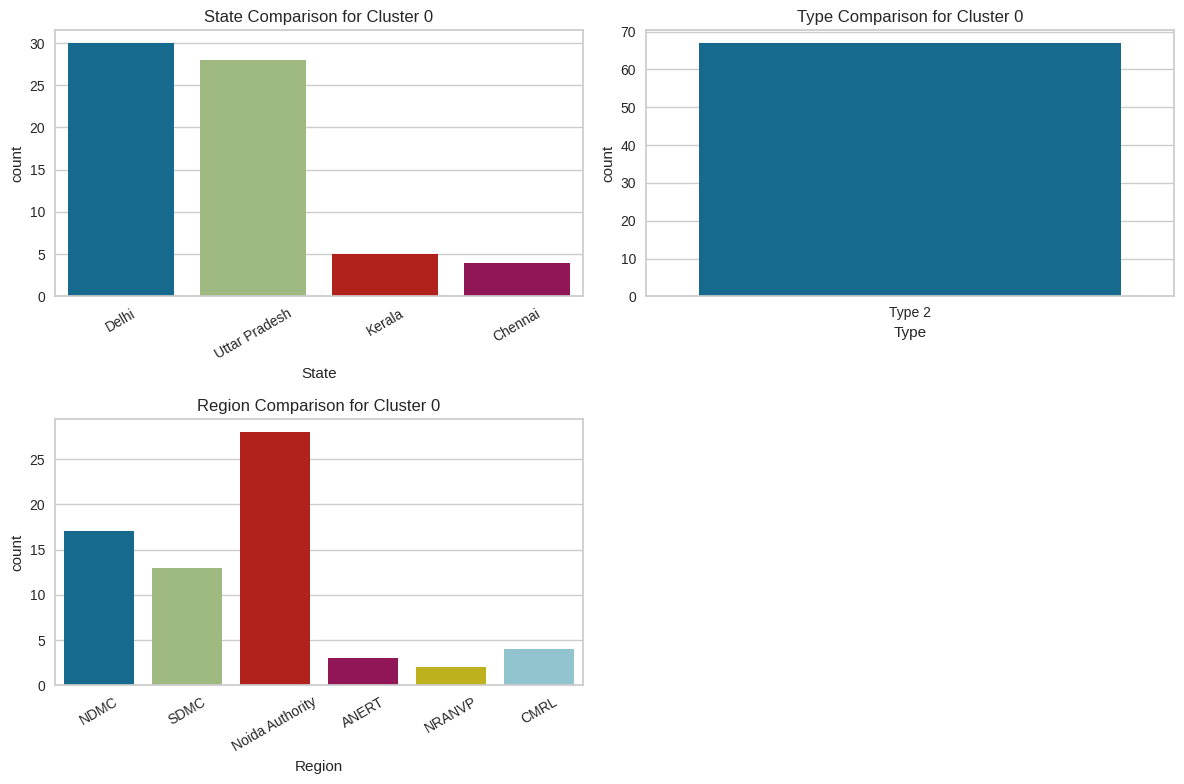

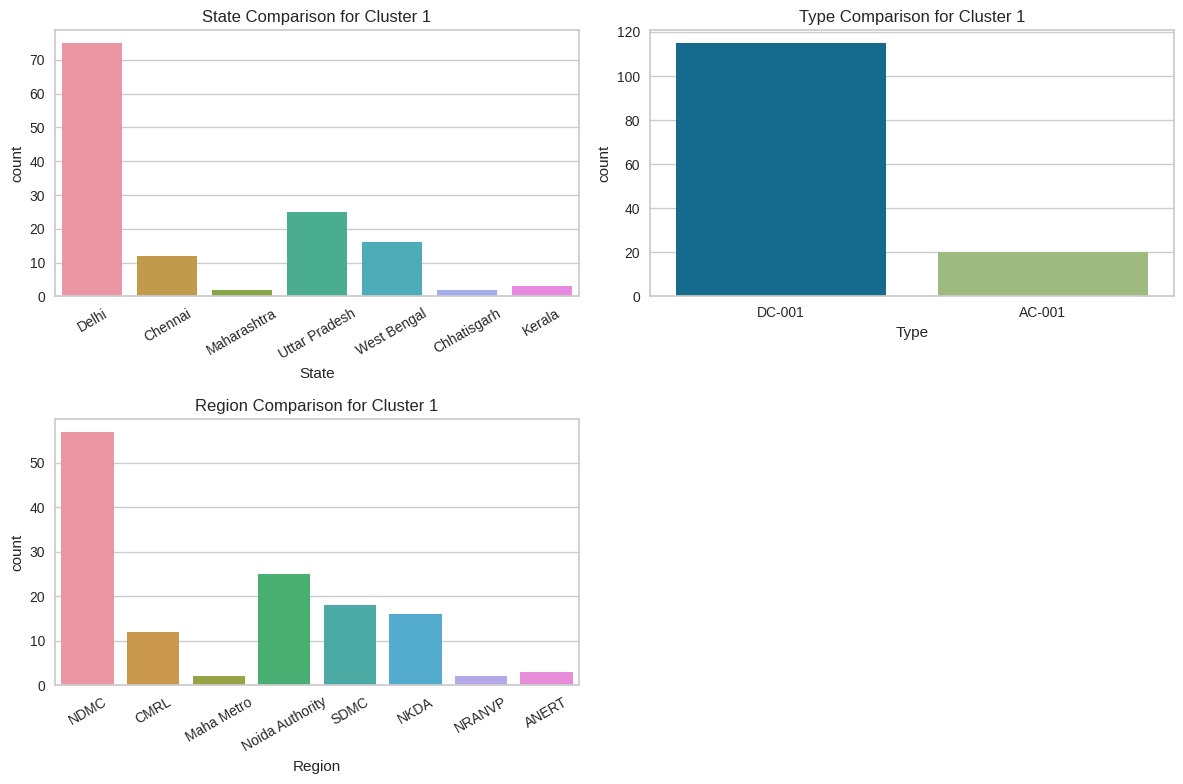

In [99]:
#STUDYING THE MARKET SEGMENTS
def compare_cluster(cluster_num):
    cluster_data = df[df_encoded['cluster_num'] == cluster_num]

    plt.figure(figsize=(12, 8))

    # Subplot 1
    plt.subplot(2, 2, 1)
    sns.countplot(x='state', data=cluster_data)
    plt.xlabel('State')
    plt.xticks(rotation=30)
    plt.title(f'State Comparison for Cluster {cluster_num}')

    # Subplot 2
    plt.subplot(2, 2, 2)
    sns.countplot(x='type', data=cluster_data)
    plt.xlabel('Type')
    plt.title(f'Type Comparison for Cluster {cluster_num}')

    # Subplot 3
    plt.subplot(2, 2, 3)
    sns.countplot(x='region', data=cluster_data)
    plt.xlabel('Region')
    plt.xticks(rotation=30)
    plt.title(f'Region Comparison for Cluster {cluster_num}')



    plt.tight_layout()
    plt.show()
for cluster in range(2):
    compare_cluster(cluster)

cluster_num
0    3.208955
1    2.888889
Name: state, dtype: float64
cluster_num
0    2.000000
1    0.851852
Name: type, dtype: float64


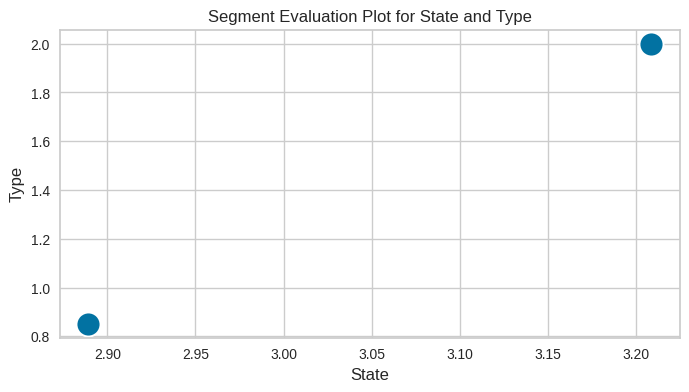

In [100]:
#STEP 8---SELECTING TARGET SEGMENTS

charging_stations['state'], charging_stations['type'] = LabelEncoder().fit_transform(charging_stations['state']), LabelEncoder().fit_transform(charging_stations['type'])

# Calculate means for each cluster
st = charging_stations.groupby('cluster_num')['state'].mean()
ty = charging_stations.groupby('cluster_num')['type'].mean()
print (st)
print (ty)

state_df = pd.DataFrame({'cluster_num': st.index, 'state': st.values})
type_df = pd.DataFrame({'cluster_num': ty.index, 'type': ty.values})

# Merging DataFrames
combined_df = state_df.merge(type_df, on='cluster_num')

plt.figure(figsize=(8, 4))
sns.scatterplot(x='state', y='type', data=combined_df, s=300)
plt.title("Segment Evaluation Plot for State and Type", fontsize=12)
plt.xlabel("State", fontsize=12)
plt.ylabel("Type", fontsize=12)
plt.show()


In [101]:
###
#DATASET 4 - Electric Cars in India
###

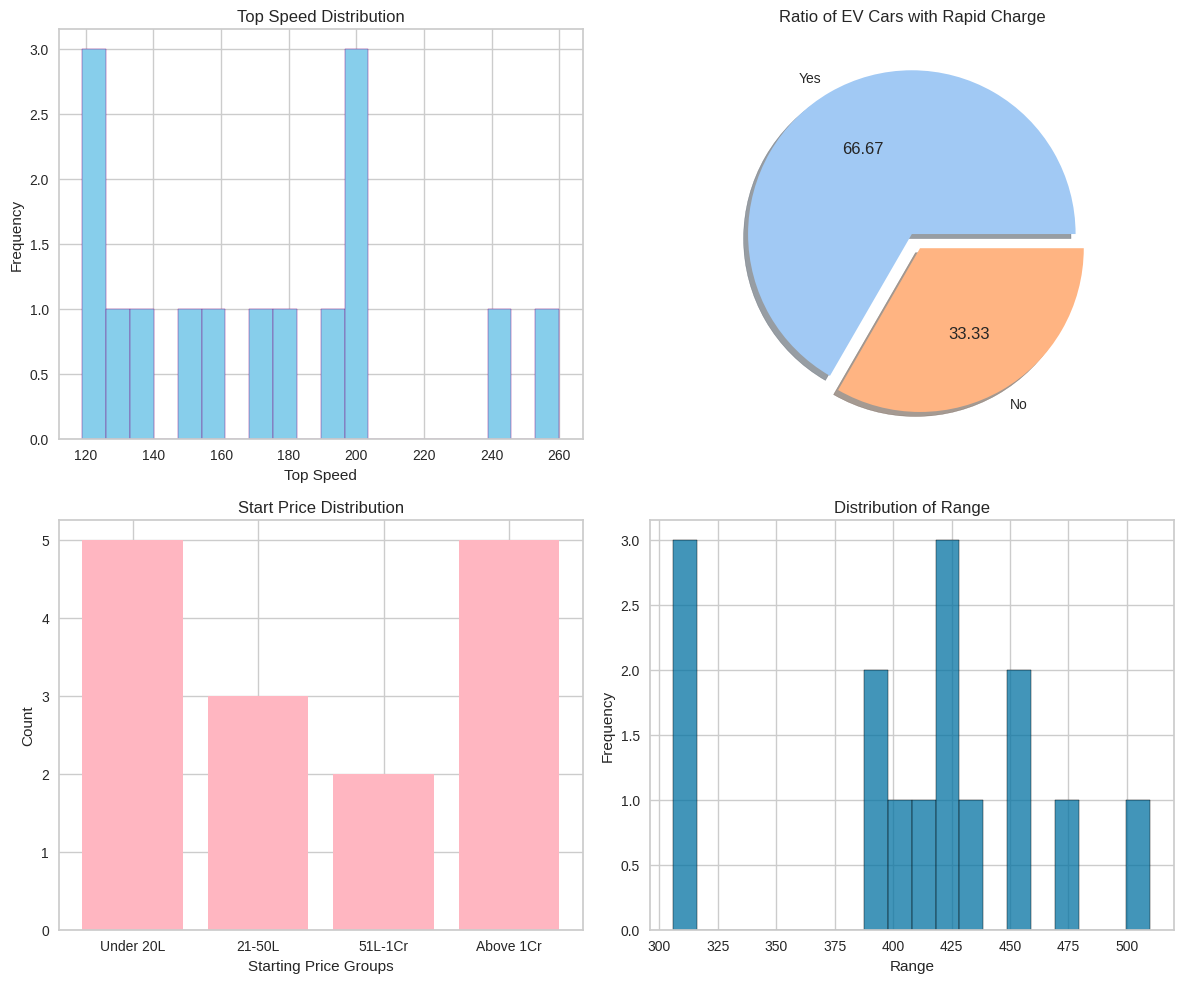

Compact SUV              7
Subcompact Sedan         1
Premium Midsize Sedan    1
Premium Coupe            1
Subcompact MPV           1
Premium Fullsize SUV     1
Premium Sports Sedan     1
Hatchback                1
Midsize SUV              1
Name: Style, dtype: int64


In [102]:
#DATASET FOR EV CARS IN INDIA AND ITS MARKET SEGMENTS

#DISTINGUISHING DATA BASED ON CERTAIN FACTORS AND GETTING A DISTRIBUTION OF EV AND NON-EV CARS

colors1 = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightpink']
colors2 = sns.color_palette("pastel")

def eda(data):

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))


    axes[0, 0].hist(data['Top_Speed'], bins=20, color='skyblue', edgecolor='purple')
    axes[0, 0].set_title('Top Speed Distribution')
    axes[0, 0].set_xlabel('Top Speed')
    axes[0, 0].set_ylabel('Frequency')

    rapidCharge_freq = data['Rapid_Charge'].value_counts(normalize=True) * 100
    axes[0, 1].pie(rapidCharge_freq, labels=rapidCharge_freq.index, autopct='%0.2f', explode=[0, 0.1], shadow=True, colors=colors2)
    axes[0, 1].set_title('Ratio of EV Cars with Rapid Charge')

    group_categories = ["Under 20L", "21-50L", "51L-1Cr", "Above 1Cr"]
    category_counts = [0, 0, 0, 0]

    for price in data['StartPrice']:
        if (int(price) < 2000000):
            category_counts[0] += 1
        elif (2100000 <= int(price) <= 5000000):
            category_counts[1] += 1
        elif (5100000 <= int(price) <= 10000000):
            category_counts[2] += 1
        else:
            category_counts[3] += 1

    axes[1, 0].bar(group_categories, category_counts, color='lightpink')
    axes[1, 0].set_xlabel('Starting Price Groups')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_title('Start Price Distribution')

    sns.histplot(data=data, x='Range', bins=20, ax=axes[1, 1])
    axes[1, 1].set_title('Distribution of Range')
    axes[1, 1].set_xlabel('Range')
    axes[1, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

eda(ev_data)

style_counts = ev_data['Style'].value_counts()
print (style_counts)


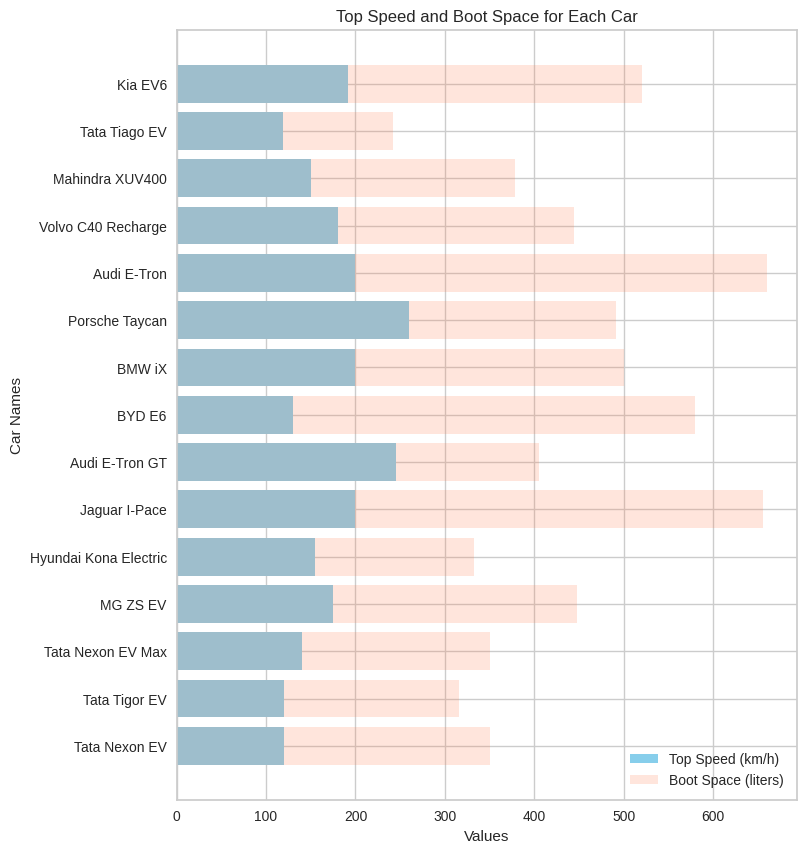

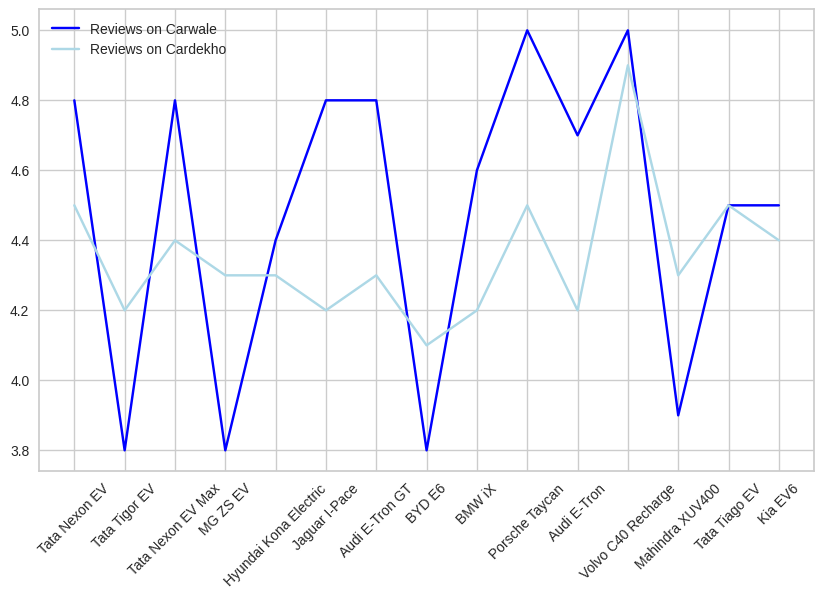

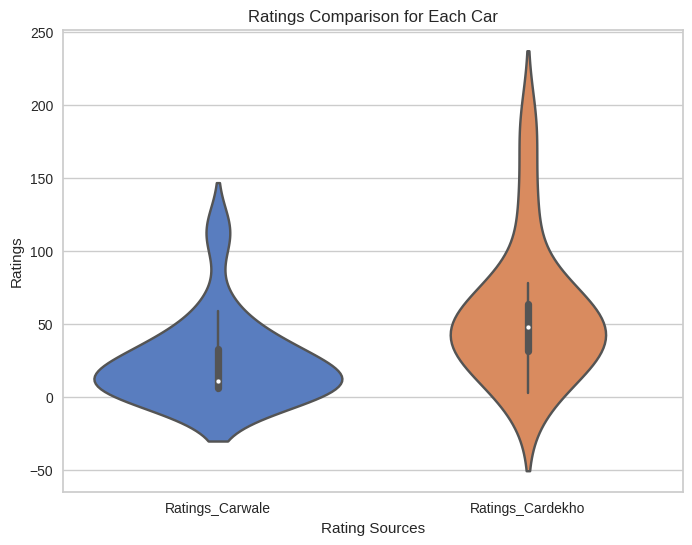

In [103]:
car_names = ev_data['Car']
top_speed = ev_data['Top_Speed']
boot_space = ev_data['BootSpace']
plt.figure(figsize=(8, 10))
plt.barh(car_names, top_speed, color='skyblue', label='Top Speed (km/h)')
plt.barh(car_names, boot_space, color='coral', label='Boot Space (liters)', alpha=0.2)

plt.xlabel('Values')
plt.ylabel('Car Names')
plt.title('Top Speed and Boot Space for Each Car')
plt.legend()
plt.show()

car_names = ev_data['Car']
carwale = ev_data['Reviews_Carwale']
cardekho = ev_data['Reviews_Cardekho']

plt.figure(figsize=(10, 6))
plt.plot(car_names,carwale, color='blue', label='Reviews on Carwale')
plt.plot( car_names,cardekho,color='lightblue', label='Reviews on Cardekho')
plt.legend()
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(data=ev_data[['Ratings_Carwale', 'Ratings_Cardekho']], palette="muted")
plt.title('Ratings Comparison for Each Car')
plt.xlabel('Rating Sources')
plt.ylabel('Ratings')
plt.show()


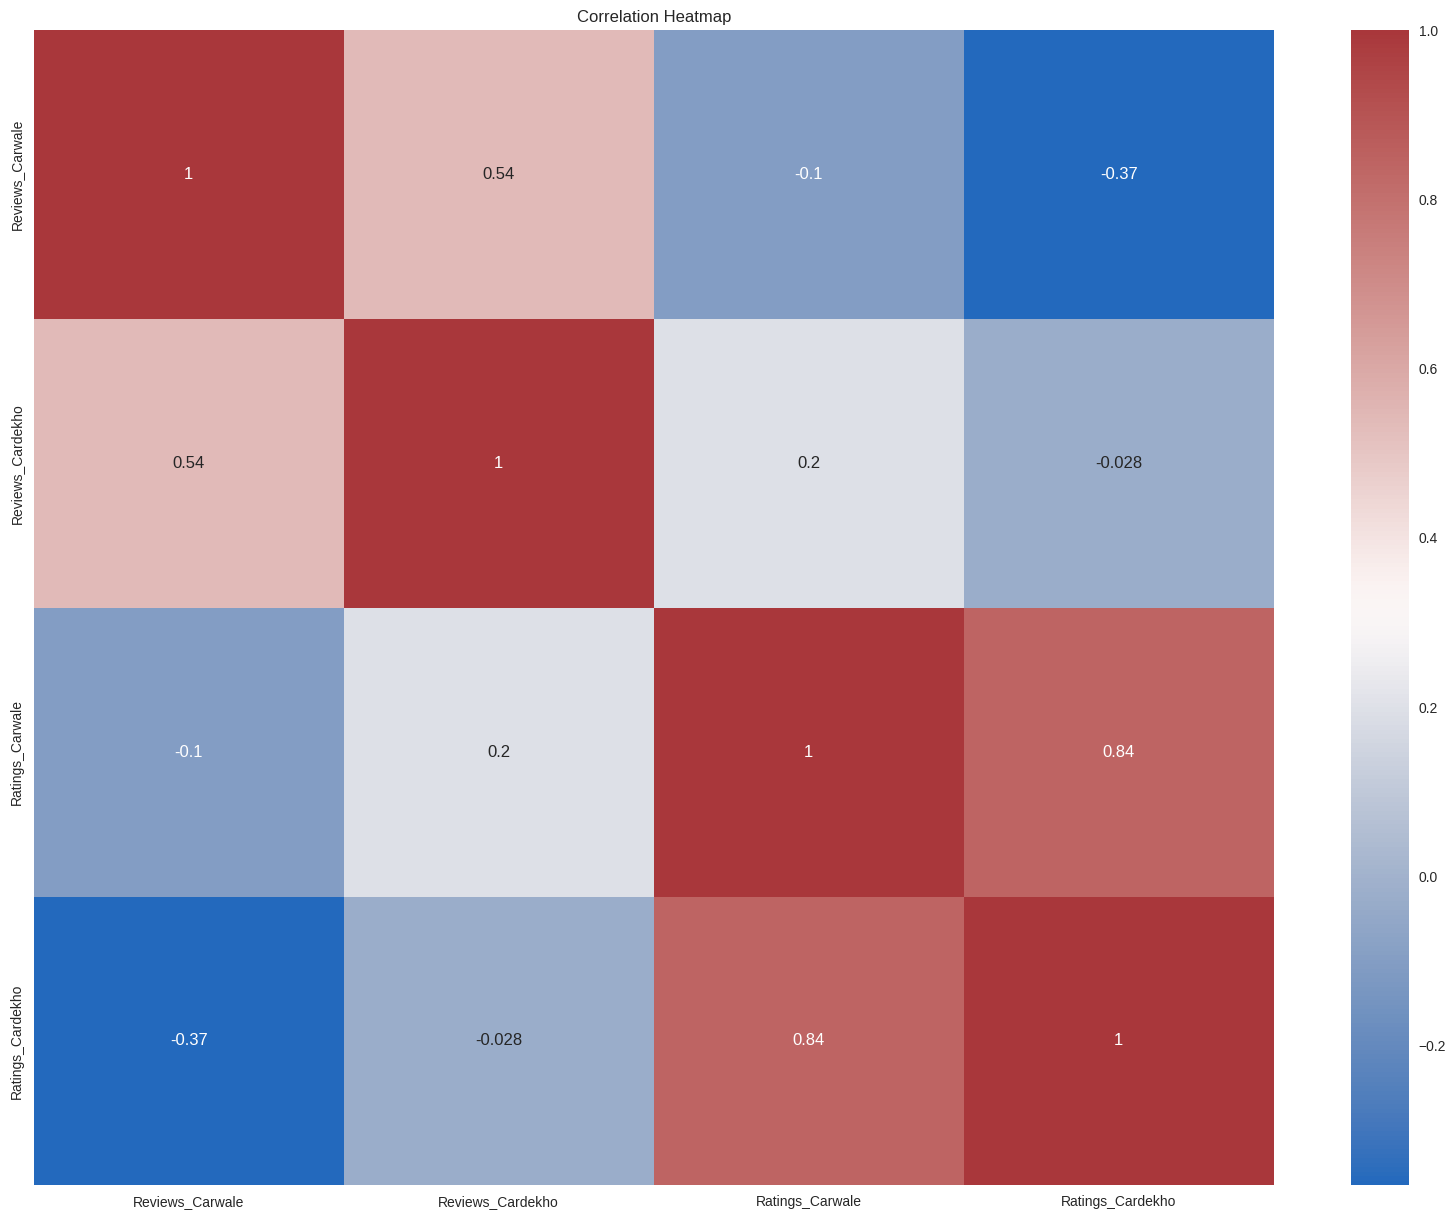

In [104]:
data_subset=ev_data[['Reviews_Carwale','Reviews_Cardekho','Ratings_Carwale','Ratings_Cardekho']]
correlation_matrix=data_subset.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='vlag')
plt.title('Correlation Heatmap')
plt.show()

                      Car  overall_reviews  overall_ratings
0           Tata Nexon EV              9.3               83
1           Tata Tigor EV              8.0               59
2       Tata Nexon EV Max              9.2               95
3                MG ZS EV              8.1               94
4   Hyundai Kona Electric              8.7              113
5           Jaguar I-Pace              9.0               33
6          Audi E-Tron GT              9.1               42
7                  BYD E6              7.9               47
8                  BMW iX              8.8               37
9          Porsche Taycan              9.5               22
10            Audi E-Tron              8.9               43
11     Volvo C40 Recharge              9.9                9
12        Mahindra XUV400              8.2              166
13          Tata Tiago EV              9.0              297
14                Kia EV6              8.9               93


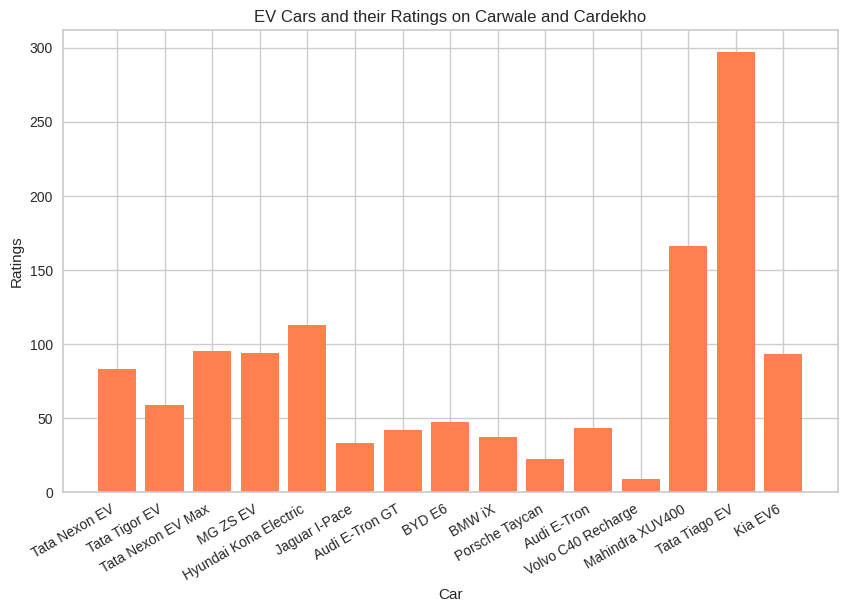

In [105]:
ev_df=pd.DataFrame(ev_data)

ev_df['overall_reviews']=ev_df['Reviews_Carwale'] + ev_df['Reviews_Cardekho']
ev_df['overall_ratings']=ev_df['Ratings_Carwale'] + ev_df['Ratings_Cardekho']
print (ev_df[['Car','overall_reviews','overall_ratings']])

plt.figure(figsize=(10,6))
plt.bar(ev_df['Car'],ev_df['overall_ratings'],color='coral')
plt.xlabel('Car')
plt.ylabel('Ratings')
plt.title('EV Cars and their Ratings on Carwale and Cardekho')
plt.xticks(rotation=30,ha='right')
plt.show()

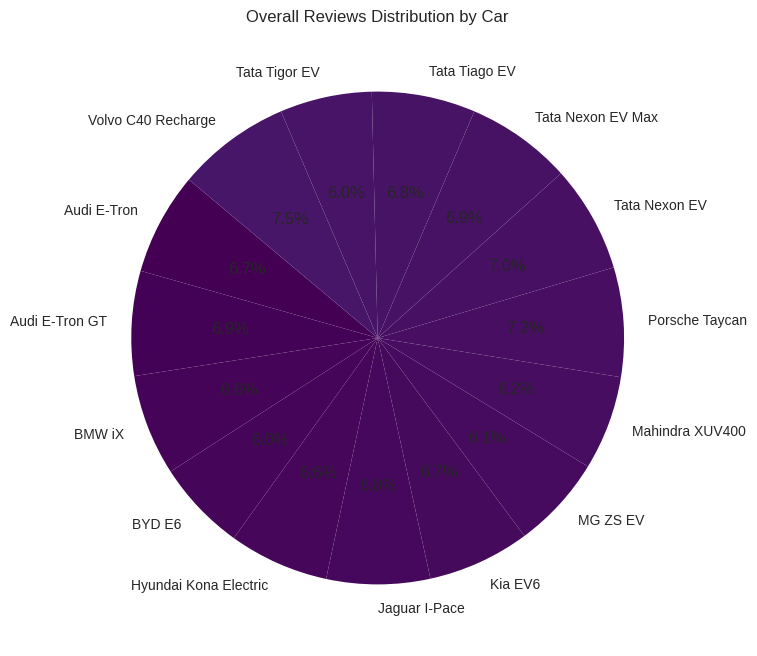

In [106]:
car_reviews = ev_df.groupby('Car')['overall_reviews'].sum()

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(car_reviews, labels=car_reviews.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis.colors)
plt.title('Overall Reviews Distribution by Car')
plt.show()

In [107]:
df_binary = ev_data.copy()
df_encoded= (df_binary.drop(['BaseModel','Car','Style'],axis=1))
df_encoded

,Brand,Plug_Type,Rapid_Charge,Top_Speed,Range,Transmission,VehicleType,StartPrice,MaxPrice,Capacity,BootSpace,Reviews_Carwale,Ratings_Carwale,Reviews_Cardekho,Ratings_Cardekho,overall_reviews,overall_ratings
0,Tata,Type 2,No,120,312,Automatic,Electric,1399000,1740000,5,350,4.8,33,4.5,50,9.3,83
1,Tata,Type 2,No,120,306,Automatic,Electric,1249000,1364000,5,316,3.8,11,4.2,48,8.0,59
2,Tata,Type 2,No,140,437,Automatic,Electric,1774000,1924000,5,350,4.8,33,4.4,62,9.2,95
3,MG,Type 2,Yes,175,419,Automatic,Electric,2199000,2588000,5,448,3.8,28,4.3,66,8.1,94
4,Hyundai,Type 2,Yes,155,452,Automatic,Electric,2379000,2398000,5,332,4.4,59,4.3,54,8.7,113
5,Jaguar,Type 2,Yes,200,470,Automatic,Electric,10600000,11200000,5,656,4.8,4,4.2,29,9.0,33
6,Audi,Type 2,Yes,245,388,Automatic,Electric,18000000,18000000,5,405,4.8,10,4.3,32,9.1,42
7,BYD,Type 2,No,130,415,Automatic,Electric,2915000,2915000,5,580,3.8,5,4.1,42,7.9,47
8,BMW,Type 2,Yes,200,425,Automatic,Electric,11600000,11600000,5,500,4.6,5,4.2,32,8.8,37
9,Porsche,Type 2,Yes,260,395,Automatic,Electric,15000000,15000000,4,491,5.0,8,4.5,14,9.5,22


In [108]:
#FOR PRINCIPAL COMPONENT ANALYSIS
label_encoder = LabelEncoder()

for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
print (df_encoded)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_encoded)

pca = PCA(n_components=10)
pca.fit(standardized_data)
principal_components = pca.transform(standardized_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10']
pf = pd.DataFrame(data = principal_components, columns = names)
print (pf.head(),'\n')

#This gives us a sense of which attributes are relevant.
print (pca.explained_variance_ratio_)


    Brand  Plug_Type  Rapid_Charge  Top_Speed  Range  Transmission  \
0       9          0             0        120    312             0   
1       9          0             0        120    306             0   
2       9          0             0        140    437             0   
3       6          0             1        175    419             0   
4       3          0             1        155    452             0   
5       4          0             1        200    470             0   
6       0          0             1        245    388             0   
7       2          0             0        130    415             0   
8       1          0             1        200    425             0   
9       8          0             1        260    395             0   
10      0          0             1        200    400             0   
11     10          0             1        180    420             0   
12      7          0             1        150    456             0   
13      9          0

In [109]:
loadings_matrix = pca.components_.T

#The loadings indicate how the original variables are combined to form principal components.
loadings = pca.components_
loadings_df = pd.DataFrame(loadings_matrix, columns=names, index=df_encoded.columns)

print("Loadings Matrix:")
print(loadings_df)

explained_variance_ratios = pca.explained_variance_ratio_
print("\nExplained Variance Ratios:")
print(explained_variance_ratios)

Loadings Matrix:
                           pc1           pc2           pc3           pc4  \
Brand             2.311551e-01 -2.842194e-01  3.344111e-01 -1.108233e-01   
Plug_Type         1.110223e-16 -5.551115e-17  1.110223e-16  1.110223e-16   
Rapid_Charge     -2.784225e-01 -7.552883e-03 -2.549884e-01 -4.465653e-01   
Top_Speed        -3.505911e-01 -1.395169e-01 -2.470472e-01 -3.699938e-03   
Range            -1.880681e-01  1.583483e-01 -9.346152e-02 -6.858129e-01   
Transmission     -5.421011e-20 -0.000000e+00  0.000000e+00  1.110223e-16   
VehicleType       0.000000e+00  2.168404e-19  0.000000e+00  0.000000e+00   
StartPrice       -3.524579e-01 -1.292673e-01 -2.203965e-01  2.218543e-01   
MaxPrice         -3.558182e-01 -1.192235e-01 -2.281516e-01  2.161071e-01   
Capacity         -8.970539e-02  3.557070e-01  3.585229e-01 -2.697299e-01   
BootSpace        -2.981986e-01  1.886053e-01 -1.542263e-02 -4.009396e-02   
Reviews_Carwale  -1.932713e-01 -4.326268e-01  5.604054e-02 -1.877661e-0

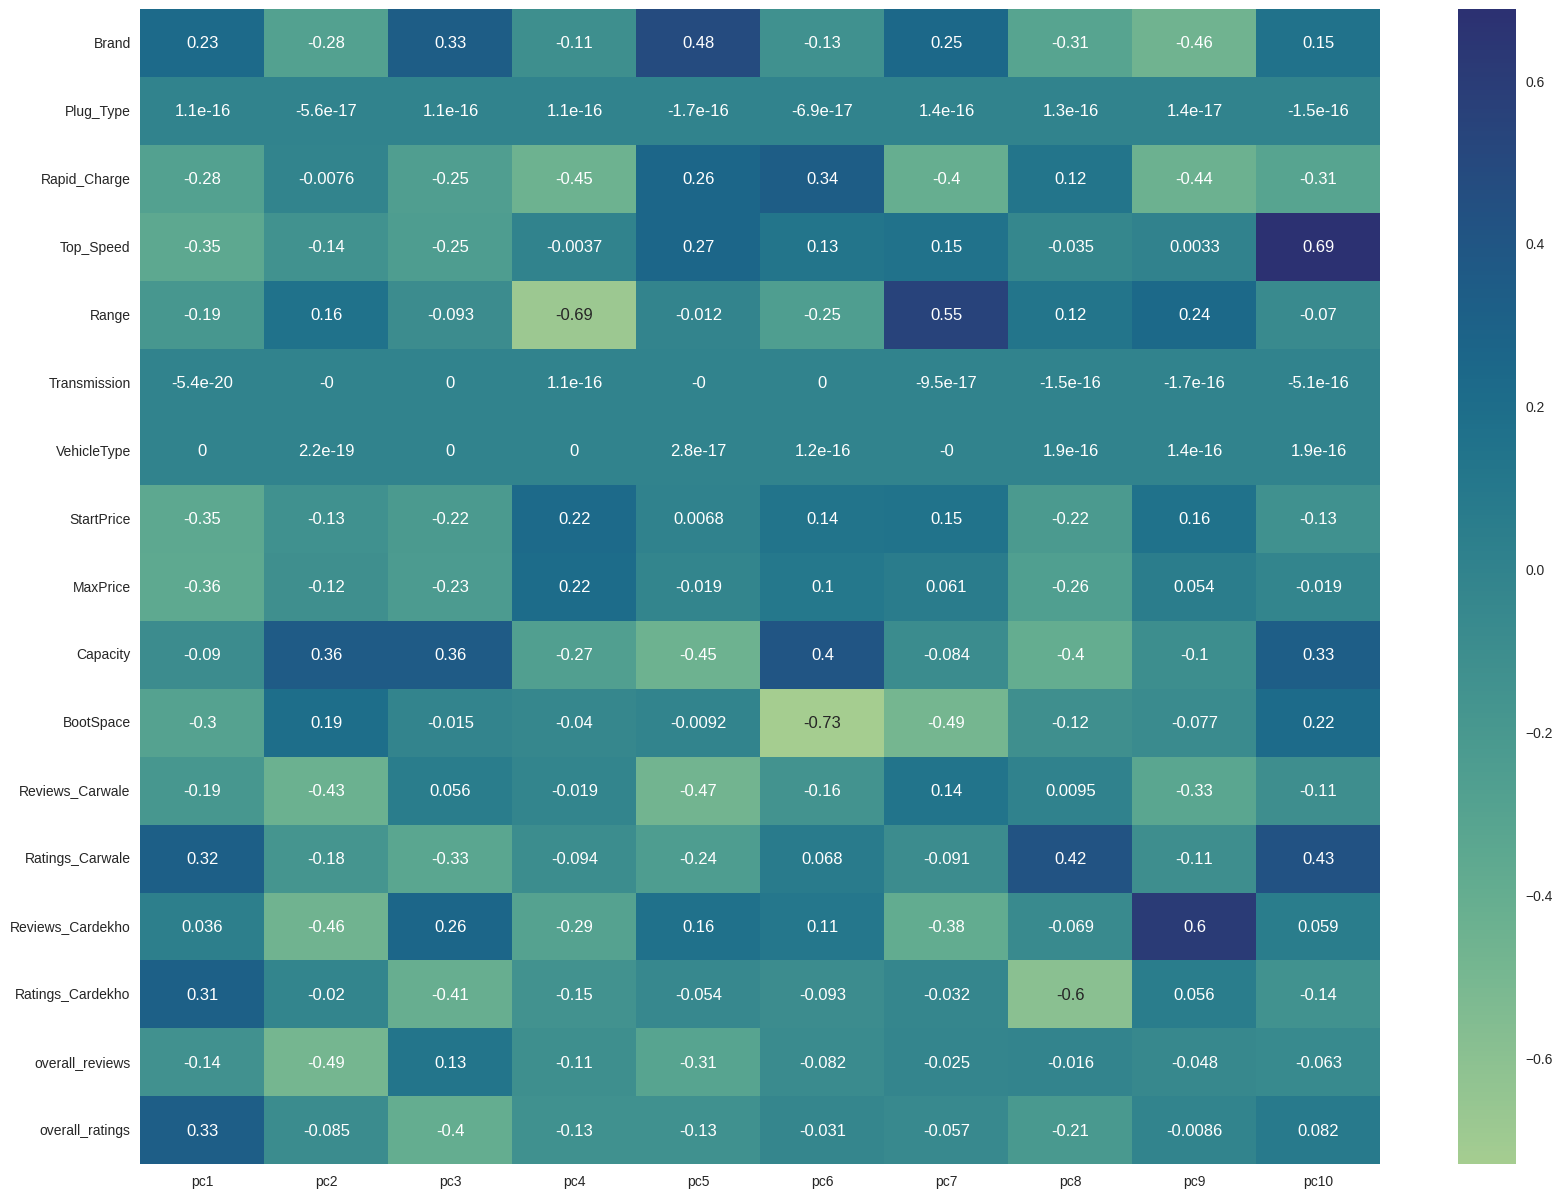

In [110]:

plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='crest')
plt.show()

[[ 1.98844361e+00 -1.31023586e+00  2.01640077e+00  8.55035477e-01
  -8.93565593e-01  1.05294213e-01 -3.18318603e-01 -1.38805782e-01
  -2.62903620e-01  1.72492268e-02 -1.07477335e-01  3.73192712e-02
  -5.89857717e-17 -1.00410803e-16  8.61199717e-17]
 [ 2.47130778e+00  1.69937379e+00  1.61892626e+00  1.82126087e+00
   9.28706224e-01  6.70868190e-01  1.91661731e-01 -1.95787343e-01
  -2.62336734e-01 -8.32995764e-02  4.01973383e-02 -2.86176726e-02
   2.76182295e-16  1.17269906e-16  2.92478384e-17]
 [ 1.53133325e+00 -7.34507133e-01  1.33770639e+00 -4.86893598e-01
  -8.63319430e-01 -4.39971909e-01  1.12972509e+00 -7.31981495e-02
  -3.32463153e-02  1.31949862e-01 -7.16990791e-02 -1.40405990e-02
  -1.94234956e-16  2.42731029e-16 -8.54521918e-18]
 [ 8.71314944e-01  1.72775191e+00 -2.23575382e-01 -6.84977154e-01
   1.16844217e+00  4.51870605e-01 -4.29715973e-01  1.64084577e-01
  -1.14554304e-01  3.41224474e-01 -3.15363907e-02  2.53821454e-02
  -2.66252783e-17  1.91388522e-16  6.73269190e-18]
 [ 9

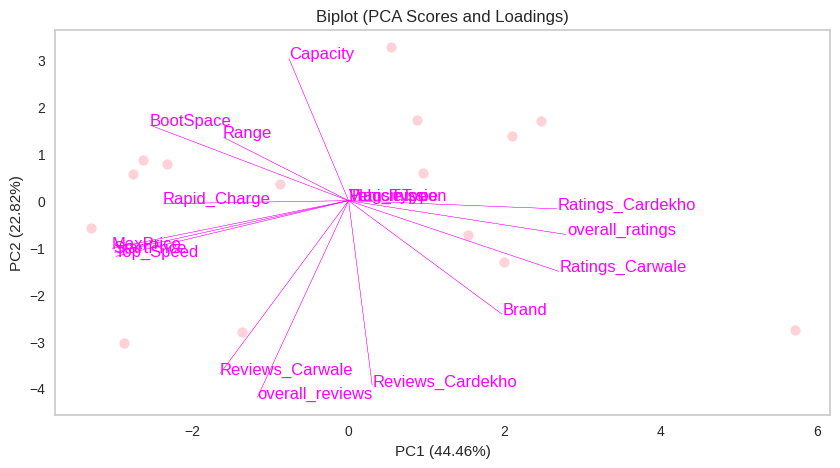

In [111]:
pca_scores = PCA().fit_transform(standardized_data)
print (pca_scores)

plt.figure(figsize=(10, 5))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], alpha=0.7, color='pink')

for i, variable in enumerate(df_encoded.columns.values):
    plt.arrow(0, 0, loadings[0, i]*8.5, loadings[1, i]*8.5, color='magenta', alpha=0.7)
    plt.text(loadings[0, i] * 8.55, loadings[1, i] * 8.55, variable, color='magenta')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.title('Biplot (PCA Scores and Loadings)')

plt.grid()
plt.show()

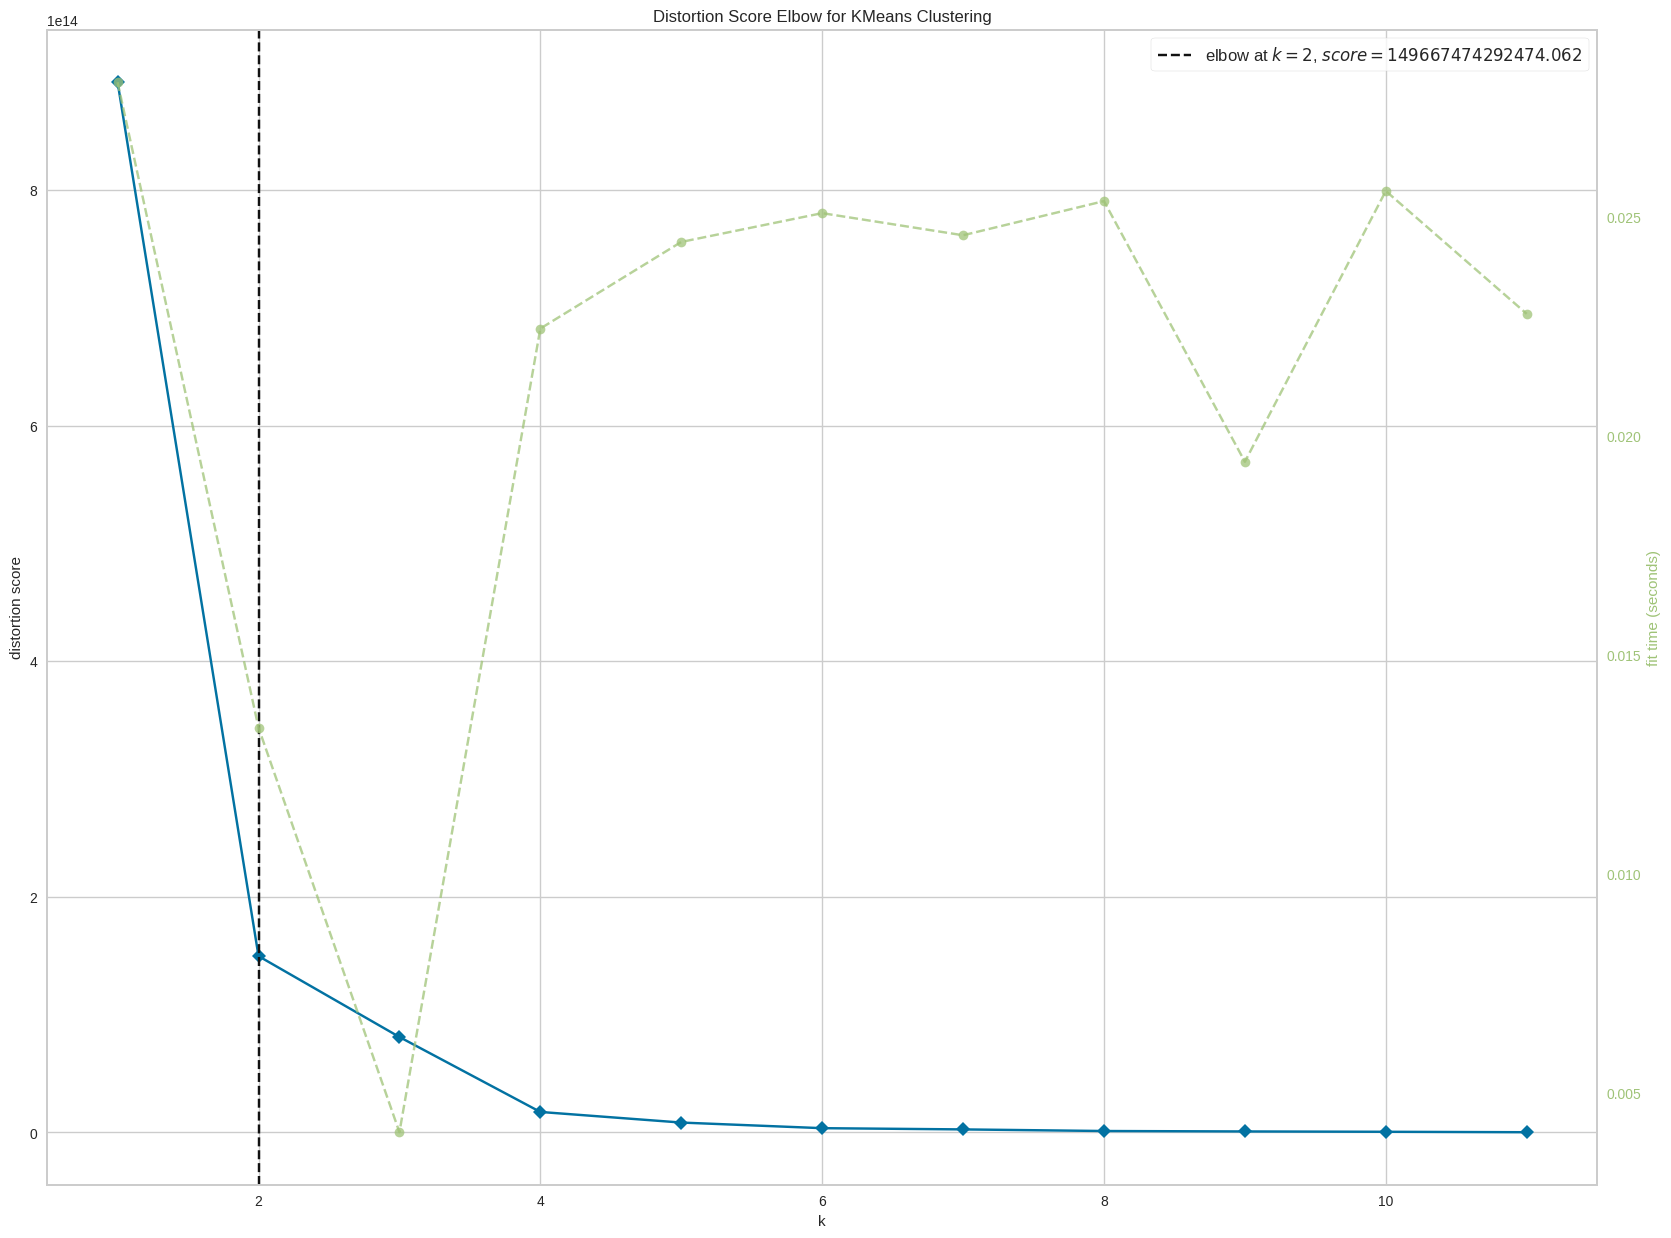

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [112]:
#STEP 5---EXTRACTING SEGMENTS
model=KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_encoded)
visualizer.show()

In [113]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(df_encoded)
df_encoded['cluster_num'] = kmeans.labels_
ev_data['cluster_num'] = kmeans.labels_
print('Cluster size: ', Counter(kmeans.labels_))


Cluster size:  Counter({0: 10, 1: 5})


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-114-25ee92f92244>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids",cmap='warmcolor')


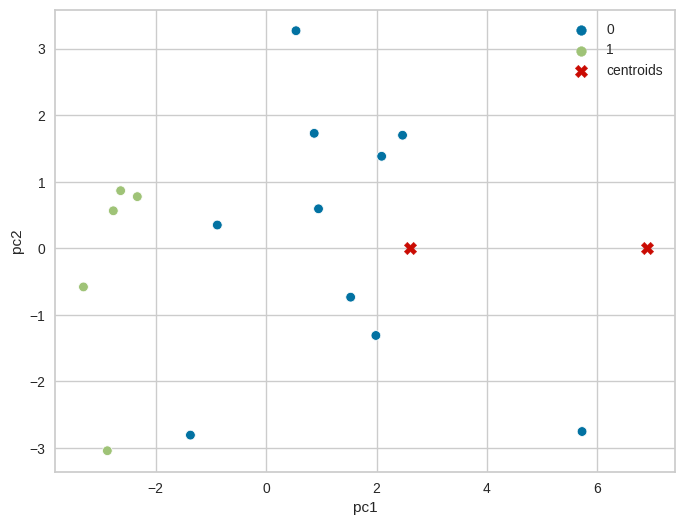

In [114]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids",cmap='warmcolor')
plt.legend()
plt.show()

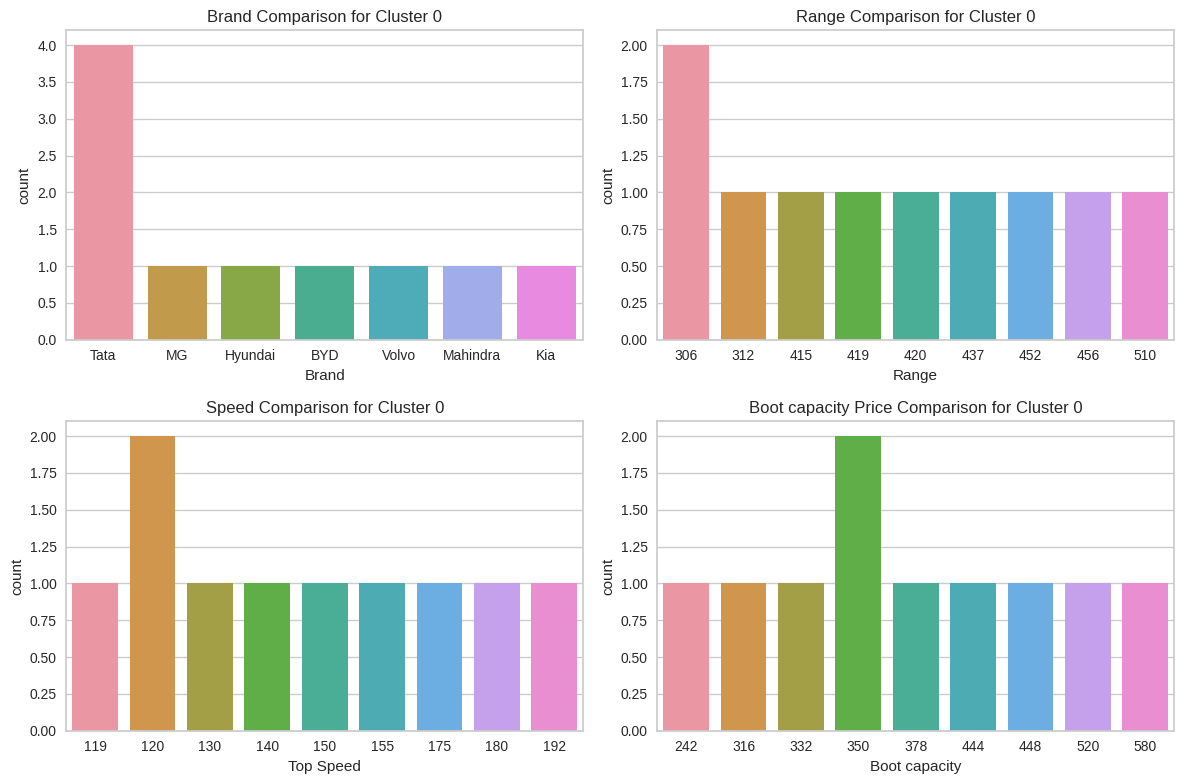

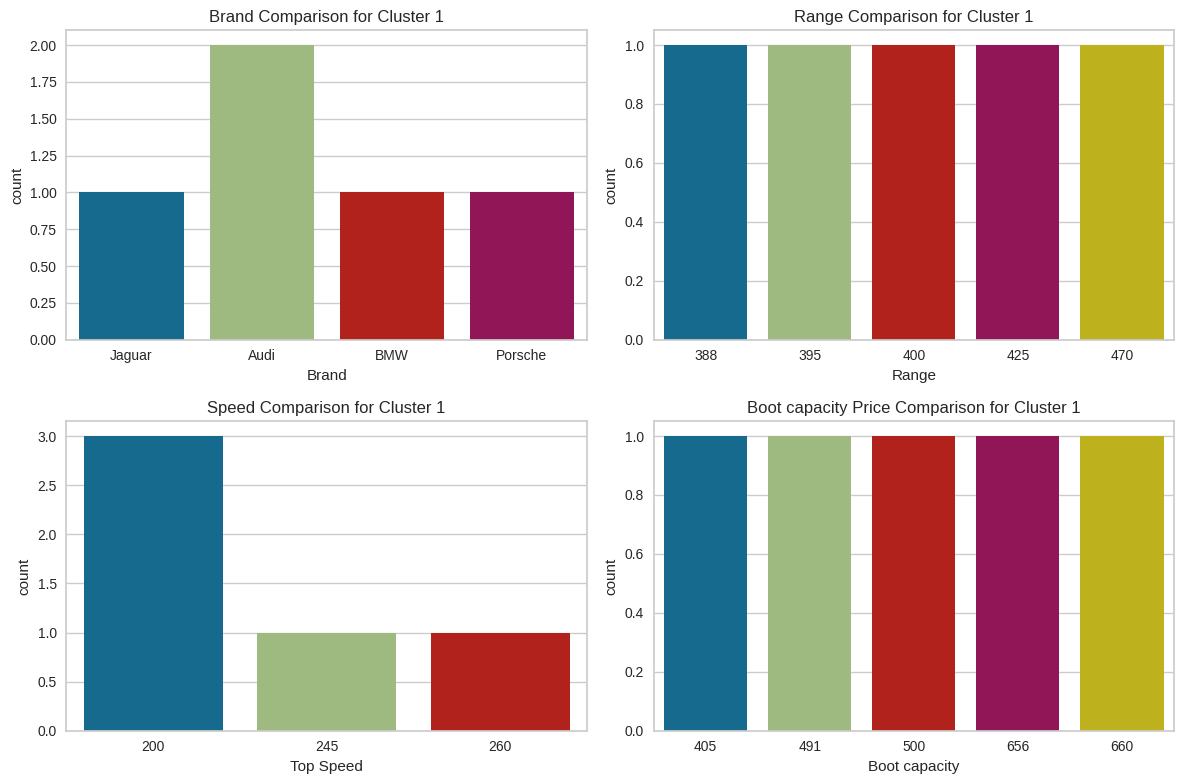

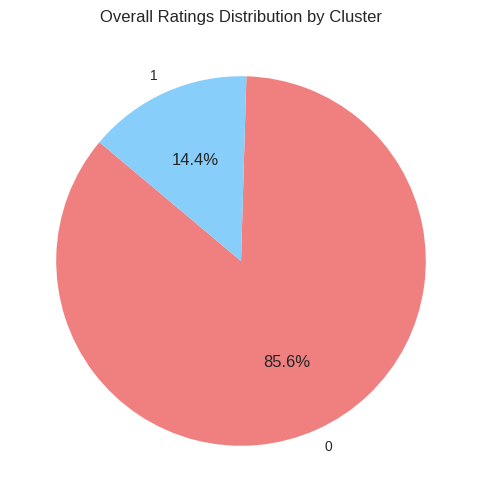

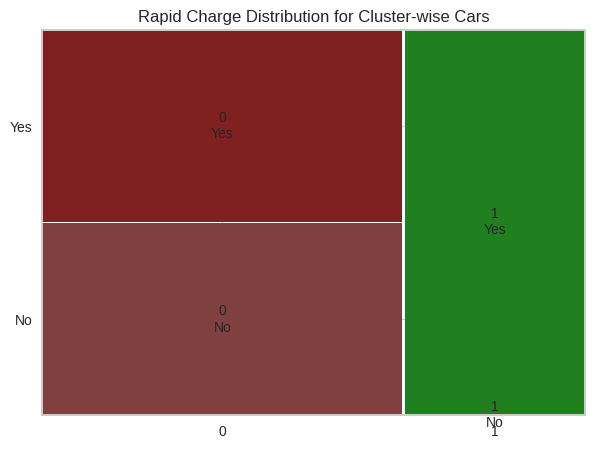

In [129]:
#STUDYING THE MARKET SEGMENTS
#STEP 7---DESCRIBE THE SEGMENTS

def compare_cluster(cluster_num):
    cluster_data = ev_df[df_encoded['cluster_num'] == cluster_num]

    plt.figure(figsize=(12, 8))

    # Subplot 1
    plt.subplot(2, 2, 1)
    sns.countplot(x='Brand', data=cluster_data)
    plt.xlabel('Brand')
    plt.title(f'Brand Comparison for Cluster {cluster_num}')

    # Subplot 2
    plt.subplot(2, 2, 2)
    sns.countplot(x='Range', data=cluster_data)
    plt.xlabel('Range')
    plt.title(f'Range Comparison for Cluster {cluster_num}')

    # Subplot 3
    plt.subplot(2, 2, 3)
    sns.countplot(x='Top_Speed', data=cluster_data)
    plt.xlabel('Top Speed')
    plt.title(f'Speed Comparison for Cluster {cluster_num}')

    # Subplot 4
    plt.subplot(2, 2, 4)
    sns.countplot(x='BootSpace',  data=cluster_data)
    plt.xlabel('Boot capacity')
    plt.title(f'Boot capacity Price Comparison for Cluster {cluster_num}')

    plt.tight_layout()
    plt.show()
for cluster in range(2):
    compare_cluster(cluster)


from statsmodels.graphics.mosaicplot import mosaic
clusters=[0,1]

cluster_ratings = ev_df.groupby('cluster_num')['overall_ratings'].sum()

# Plotting pie chart
plt.figure(figsize=(10, 6))
plt.pie(cluster_ratings, labels=cluster_ratings.index, autopct='%1.1f%%', startangle=140, colors=colors1)
plt.title('Overall Ratings Distribution by Cluster')
plt.show()

# Mosaic Plot
clusters = [0, 1]
crosstab_rc = pd.crosstab(ev_df['cluster_num'], ev_df['Rapid_Charge'])
plt.rcParams['figure.figsize'] = (7, 5)
mosaic(crosstab_rc.stack())
plt.title('Rapid Charge Distribution for Cluster-wise Cars')
plt.show()


cluster_num
0    8.8
1    3.4
Name: Car, dtype: float64
cluster_num
0    1.8
1    3.6
Name: Style, dtype: float64
cluster_num
0    6.7
1    7.6
Name: BaseModel, dtype: float64


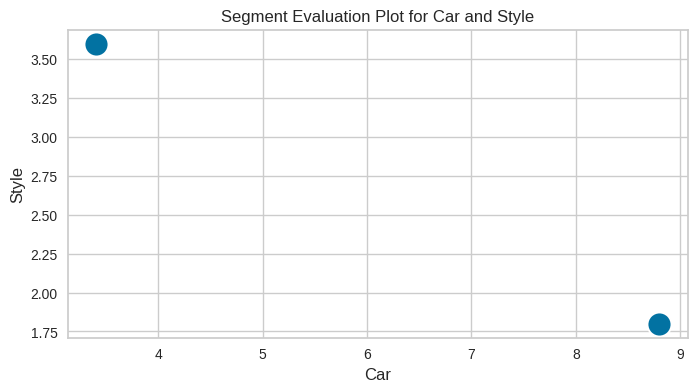

In [121]:
#STEP 8---SELECTING TARGET SEGMENTS
ev_data['Car'], ev_data['Style'],ev_data['BaseModel'] = LabelEncoder().fit_transform(ev_data['Car']), LabelEncoder().fit_transform(ev_data['Style']),LabelEncoder().fit_transform(ev_data['BaseModel'])

car=ev_data.groupby('cluster_num')['Car'].mean()
sty=ev_data.groupby('cluster_num')['Style'].mean()
bm=ev_data.groupby('cluster_num')['BaseModel'].mean()
print (car)
print (sty)
print (bm)

car_df=pd.DataFrame({'cluster_num':car.index,'Car':car.values})
sty_df=pd.DataFrame({'cluster_num':sty.index,'Style':sty.values})
bm_df=pd.DataFrame({'cluster_num':bm.index,'BaseModel':bm.values})
# Merging DataFrames
combined_df2=car_df.merge(sty_df,on='cluster_num').merge(bm_df,on='cluster_num')

plt.figure(figsize=(8, 4))
sns.scatterplot(x='Car', y='Style', data=combined_df2, s=300)
plt.title("Segment Evaluation Plot for Car and Style", fontsize=12)
plt.xlabel("Car", fontsize=12)
plt.ylabel("Style", fontsize=12)
plt.show()
